In [1]:
from pycaret.regression import *
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import *
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import *
from xgboost.sklearn import XGBRegressor
from lightgbm.sklearn import LGBMRegressor
from catboost.core import CatBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, DotProduct
from sklearn_rvm.em_rvm import EMRVR

# MAE, MSE, RMSE
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

In [2]:
def load_dataset(dataset):
    if dataset == 'ixi':
        ixi_train = pd.read_csv('./dataset/ixi_train.csv', index_col = 0)
        ixi_test = pd.read_csv('./dataset/ixi_test.csv', index_col = 0)

        # AGE에서 소수점 아래를 버림 -> for stratified k fold
        ixi_train['age'] = ixi_train['age'].astype('int64')
        ixi_test['age'] = ixi_test['age'].astype('int64')

        # 모든 feature의 dtype : float64
        ixi_train = ixi_train.astype('float64')
        ixi_test = ixi_test.astype('float64')
        return ixi_train, ixi_test
    
    elif dataset == 'hcp':
        hcp_train = pd.read_csv('./dataset/hcp_train.csv', index_col=0)
        hcp_test = pd.read_csv('./dataset/hcp_test.csv', index_col=0)

        hcp_train = hcp_train.astype('float64')
        hcp_test = hcp_test.astype('float64')
        return hcp_train, hcp_test
    
    elif dataset =='cc':
        cc_train = pd.read_csv('./dataset/cc_train.csv', index_col = 0)
        cc_test = pd.read_csv('./dataset/cc_test.csv', index_col = 0)

        cc_train = cc_train.astype('float64')
        cc_test = cc_test.astype('float64')
        return cc_train, cc_test

# IXI

In [3]:
ixi_train, ixi_test = load_dataset('ixi')

In [4]:
ixi_setting = setup(session_id = 1, data = ixi_train, target = 'age', test_data = ixi_test, normalize = True, normalize_method = 'zscore',transformation=True, fold_strategy='stratifiedkfold', use_gpu = True)

,Description,Value
0,session_id,1
1,Target,age
2,Original Data,"(453, 154)"
3,Missing Values,False
4,Numeric Features,153
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(453, 153)"


In [13]:
def cal_pearson(y, y_pred):
    return np.corrcoef(y, y_pred)[0,1]

In [14]:
add_metric('r', 'R', cal_pearson)

Name                                                            R
Display Name                                                    R
Score Function       <function cal_pearson at 0x000001E628A31A60>
Scorer                                   make_scorer(cal_pearson)
Target                                                       pred
Args                                                           {}
Greater is Better                                            True
Custom                                                       True
Name: r, dtype: object

In [15]:
# 직접 Best Model을 호출 
# 26 Models 
ixi_ada = AdaBoostRegressor(learning_rate=0.5, loss='square', n_estimators=230,random_state=1)
ixi_ard = ARDRegression(lambda_1=1.7, lambda_2=1.7)
ixi_br = BayesianRidge(alpha_1=0.0001, alpha_2=0.001, lambda_1=0.3, lambda_2=0.05)
ixi_dt = DecisionTreeRegressor(ccp_alpha=0.2, criterion='mae', max_depth=6,max_features=1.0, min_impurity_decrease=0.05,min_samples_leaf=2, min_samples_split=10)
ixi_en = ElasticNet(alpha=0.33, l1_ratio=0.668)
ixi_et = ExtraTreesRegressor(max_depth=9, max_features=1.0, min_impurity_decrease=0.02,min_samples_leaf=2, n_estimators=230, n_jobs=-1)
ixi_gbm = GradientBoostingRegressor(loss='lad', max_depth=2, max_features=1.0,min_impurity_decrease=0.01, min_samples_split=5,n_estimators=180, random_state=1, subsample=0.75)
ixi_huber = HuberRegressor(alpha=0.7, epsilon=1.8)
ixi_kr = KernelRidge(kernel='polynomial')
ixi_knn = KNeighborsRegressor(metric='manhattan', n_jobs=-1, n_neighbors=8,weights='distance')
ixi_lar = Lars(eps=1e-05, n_nonzero_coefs=53, normalize=False)
ixi_lasso = Lasso(alpha=0.2)
ixi_llar = LassoLars(alpha=0.2, normalize=False)
ixi_lgbm = LGBMRegressor(bagging_fraction=0.9, bagging_freq=2, feature_fraction=0.6,max_depth=8, min_child_samples=100, min_split_gain=0.6,n_estimators=280, num_leaves=70, reg_alpha=0.1, reg_lambda=0.001)
ixi_lr = LinearRegression()
ixi_mlp = MLPRegressor(activation='tanh', alpha=1e-07, hidden_layer_sizes=[50, 50, 100], solver='lbfgs')
ixi_omp = OrthogonalMatchingPursuit(n_nonzero_coefs=10)
ixi_par = PassiveAggressiveRegressor(C=0.0001, loss='squared_epsilon_insensitive')
ixi_rf = RandomForestRegressor(criterion='mae', max_depth=13, n_jobs=-1)
ixi_ransac = RANSACRegressor(base_estimator=LinearRegression(), max_skips=20, max_trials=6,min_samples=0.95, stop_n_inliers=10, stop_probability=0.0)
ixi_ridge = Ridge(alpha=0.37, normalize=True)
ixi_svm = SVR(C=0.047, epsilon=1.55, kernel='linear')
ixi_xgboost = XGBRegressor(max_depth=5, learning_rate=0.1, subsample=0.7, colsample_bytree=0.7)
ixi_tr = TheilSenRegressor(n_jobs=-1)
ixi_catboost = CatBoostRegressor()
ixi_gp = GaussianProcessRegressor(alpha=1.0, kernel=DotProduct(sigma_0=1))

ixi_best_models = [ixi_ada, ixi_ard, ixi_br, ixi_dt, ixi_en, ixi_et, ixi_gbm, ixi_huber, ixi_kr,
                   ixi_knn, ixi_lar, ixi_lasso, ixi_llar, ixi_lgbm, ixi_lr, ixi_mlp, ixi_omp, ixi_par,
                   ixi_rf, ixi_ransac, ixi_ridge, ixi_svm, ixi_xgboost, ixi_tr, ixi_catboost, ixi_gp]

ixi_model_names = ['Adaboost', 'ARD','Bayesian Ridge', 'Decision Tree', 'ElasticNet', 'ExtraTreesRegressor','GradientBoostingRegressor','HuberRegressor','KernelRidge','KNeighborRegressor','Lars','Lasso',
                  'LassoLars','LGBMRegressor','LinearRegression','MLPRegressor','OrthogonalMatchingPursuit','PassiveAggressiveRegressor','RandomForestRegressor','RANSAC','Ridge','SVR','XGBRegressor', 
                  'TheilsenRegressor', 'Catboost','GaussianProcess']



**Training Best Models**

In [16]:
ixi_trained_models = compare_models(n_select=26, sort='MAE', include=ixi_best_models)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,R,TT (Sec)
4,Elastic Net,7.3865,83.6484,9.1223,0.6866,0.2140,0.1809,0.8343,0.0160
12,Least Angle Regression,7.4126,85.5100,9.2080,0.6790,0.2186,0.1807,0.8290,0.0160
11,Lasso Regression,7.4129,85.5199,9.2085,0.6790,0.2186,0.1807,0.8290,0.0220
20,Ridge Regression,7.4285,84.7094,9.1804,0.6840,0.2141,0.1809,0.8329,0.0060
2,Bayesian Ridge,7.4376,85.4214,9.2152,0.6813,0.2155,0.1808,0.8308,0.0740
1,Automatic Relevance Determination,7.4790,87.2582,9.3023,0.6735,0.2207,0.1817,0.8268,0.2270
8,Kernel Ridge,7.5138,84.7152,9.1818,0.6844,0.2146,0.1787,0.8316,0.0100
21,Support Vector Regression,7.5350,86.3676,9.2671,0.6784,0.2140,0.1833,0.8303,0.0230
6,Gradient Boosting Regressor,7.5873,91.8074,9.5333,0.6590,0.2181,0.1854,0.8161,0.8460
13,Light Gradient Boosting Machine,7.6084,90.4491,9.4920,0.6602,0.2158,0.1834,0.8196,0.0660


In [17]:
print(len(ixi_trained_models))

26


In [18]:
ixi_train_sg = pull().reset_index(drop=True)
ixi_train_sg.loc[1, 'Model'] = 'Lasso Least Angle Regression'
ixi_train_sg.loc[24, 'Model'] = 'Random Sample Consensus'
# ixi_train_sg.loc[6, 'Model'] = 'Relevance Vecotr Machine'

In [20]:
ixi_train_sg.to_csv('./dataframe/ixi/ixi_train_score_grid.csv')

**Save Best Models**

In [8]:
for ixi_model in ixi_trained_models:
    if str(ixi_model).startswith('<catboost'):
        save_model(ixi_model, f"./models/ixi/best_model/Catboost")
    else:
        save_model(ixi_model, f"./models/ixi/best_model/{str(ixi_model).split('(')[0]}")

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully

**Load Models**

In [22]:
def load_pipelines(dataset):
    
    # Load Model
    load_ada = load_model(f'./models/{dataset}/best_model/AdaBoostRegressor')# 1
    load_ard = load_model(f'./models/{dataset}/best_model/ARDRegression')# 2
    load_br = load_model(f'./models/{dataset}/best_model/BayesianRidge')# 3
    load_dt = load_model(f'./models/{dataset}/best_model/DecisionTreeRegressor')# 4
    load_en = load_model(f'./models/{dataset}/best_model/ElasticNet')# 5
    load_et = load_model(f'./models/{dataset}/best_model/ExtraTreesRegressor')# 6
    load_gbr = load_model(f'./models/{dataset}/best_model/GradientBoostingRegressor')# 7
    load_hr = load_model(f'./models/{dataset}/best_model/HuberRegressor')# 8
    load_kr = load_model(f'./models/{dataset}/best_model/KernelRidge')# 9
    load_knn = load_model(f'./models/{dataset}/best_model/KNeighborsRegressor')# 10
    load_lars = load_model(f'./models/{dataset}/best_model/Lars')# 11
    load_lasso = load_model(f'./models/{dataset}/best_model/Lasso')# 12
    load_llar = load_model(f'./models/{dataset}/best_model/LassoLars')# 13
    load_lgbm = load_model(f'./models/{dataset}/best_model/LGBMRegressor')# 14
    load_lr = load_model(f'./models/{dataset}/best_model/LinearRegression')# 15
    load_mlp = load_model(f'./models/{dataset}/best_model/MLPRegressor')# 16
    load_omp = load_model(f'./models/{dataset}/best_model/OrthogonalMatchingPursuit')# 17
    load_par = load_model(f'./models/{dataset}/best_model/PassiveAggressiveRegressor')# 18
    load_rf = load_model(f'./models/{dataset}/best_model/RandomForestRegressor')# 19
    load_ransac = load_model(f'./models/{dataset}/best_model/RANSACRegressor')# 10
    load_ridge = load_model(f'./models/{dataset}/best_model/Ridge')# 21
    load_svr = load_model(f'./models/{dataset}/best_model/SVR')# 22
    load_xgbr = load_model(f'./models/{dataset}/best_model/XGBRegressor')# 23
    load_tr = load_model(f'./models/{dataset}/best_model/TheilSenRegressor')# 24
    load_catboost = load_model(f'./models/{dataset}/best_model/Catboost')# 25
    load_gp = load_model(f'./models/{dataset}/best_model/GaussianProcessRegressor') # 26
    #load_rvm = load_model(f'./models/{dataset}/best_model/EMRVR')




    model_list = [load_ada, load_ard, load_br, load_dt, load_en, load_et, load_gbr, load_hr, load_kr, load_knn, load_lars, load_lasso, load_llar, load_lgbm,
             load_lr, load_mlp, load_omp, load_par, load_rf, load_ransac, load_ridge, load_svr, load_xgbr, load_tr, load_catboost, load_gp]
    model_name_list = ['Adaboost', 'ARD','Bayesian Ridge', 'Decision Tree', 'ElasticNet', 'ExtraTreesRegressor','GradientBoostingRegressor','HuberRegressor','KernelRidge','KNeighborRegressor','Lars','Lasso',
                  'LassoLars','LGBMRegressor','LinearRegression','MLPRegressor','OrthogonalMatchingPursuit','PassiveAggressiveRegressor','RandomForestRegressor','RANSAC','Ridge','SVR','XGBRegressor', 
                  'TheilsenRegressor', 'Catboost','GaussianProcess']
    
    return model_list, model_name_list

In [23]:
ixi_trained_model, ixi_trained_model_name = load_pipelines('ixi')

Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and 

**Feature Importance**

In [24]:
def save_feature_importance(dataset):
    # MLP와 KNN은 제외 
    print(f"{dataset.upper()} Start!")
    
    train, test = load_dataset(dataset)
    model_list, model_name_list = load_pipelines(dataset)
    
    linear_list = [1,2,4,7,10,11,12,14,16,17,20,21,23] # 13개
    tree_list = [0,3,5,6,13,18,22,24] # 8개
    
    feat_imp_dict = {}
    
    # Save Linear Model Coefficient 
    for i in linear_list:
        model = model_list[i]['trained_model']
        feat_importance = model.coef_
        feat_imp_dict[model_name_list[i]] = feat_importance.flatten()
    
    # Save Tree Model feature importance 
    for i in tree_list:
        model = model_list[i]['trained_model']
        feat_importance = model.feature_importances_
        feat_imp_dict[model_name_list[i]] = feat_importance.flatten()
        
        
        
    # RANSAC ,Gaussian Process, Kernel Ridge는 일반적인 Linear, Tree Model 방식으로는 적용  X 
    # RANSAC  # 22
    load_ransac = model_list[19]['trained_model']
    feat_importance = load_ransac.estimator_.coef_
    feat_imp_dict['RANSAC'] = feat_importance.flatten()
    
    # Gaussian Process  # 23 
    gp_model = model_list[25]['trained_model']
    gp_linear_reg = LinearRegression()
    gp_x = gp_model.X_train_
    gp_y = gp_model.y_train_
    gp_linear_reg.fit(gp_x, gp_y)
    feat_importance = gp_linear_reg.coef_
    feat_imp_dict['GaussianProcess'] = feat_importance.flatten()
    
    # Kernel Ridge  # 24
    load_kr = model_list[8]['trained_model']
    kr_x = train.drop('age', axis=1)
    kr_y = train['age']
    
    scaler = StandardScaler()
    scaler.fit(kr_x)
    zscore_x = scaler.transform(kr_x)
    
    ridge_model = Ridge() 
    ridge_model.fit(zscore_x, kr_y)
    
    feat_importance= ridge_model.coef_
    feat_imp_dict['KernelRidge'] = feat_importance.flatten()

    
    # Convert To DataFrame 
    feat_imp_df = pd.DataFrame(feat_imp_dict)
    
    # Sorting
    #model_name_list = ['LinearRegression', 'Lasso', 'Ridge', 'Elasticnet','Lars','LassoLars','OMP','Bayesianridge','ARD','PAR','RANSAC','TheilSen','Huber','Kernelridge','SVR','GaussianProcess',
      #            'Decisiontree','Randomforest','ExtraTrees', 'Adaboost','Gradientboosting','XGboost','LightGBM','CatBoost', 'Kneighbors','MLP']

    feat_imp_list = ['LinearRegression', 'Lasso', 'Ridge', 'ElasticNet','Lars','LassoLars','OrthogonalMatchingPursuit','Bayesian Ridge', 'ARD', 'PassiveAggressiveRegressor', 'RANSAC', 'TheilsenRegressor','HuberRegressor','KernelRidge','SVR','GaussianProcess',
                      'Decision Tree','RandomForestRegressor','ExtraTreesRegressor', 'Adaboost','GradientBoostingRegressor','XGBRegressor','LGBMRegressor','Catboost']
    
    feat_imp_df = feat_imp_df[feat_imp_list]
    
    return feat_imp_df


# ixi_feat_imp = save_feature_importance('ixi')
# hcp_feat_imp = save_feature_importance('hcp')
# cc_feat_imp = save_feature_importance('cc')

In [25]:
ixi_feat_imp = save_feature_importance('ixi')

IXI Start!
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pi

In [26]:
ixi_feat_imp

,LinearRegression,Lasso,Ridge,ElasticNet,Lars,LassoLars,OrthogonalMatchingPursuit,Bayesian Ridge,ARD,PassiveAggressiveRegressor,...,SVR,GaussianProcess,Decision Tree,RandomForestRegressor,ExtraTreesRegressor,Adaboost,GradientBoostingRegressor,XGBRegressor,LGBMRegressor,Catboost
0,4.823057,3.307069,1.383574,1.807317,2.707378,3.310613,0.000000,1.803386,3.715754,2.492060,...,1.539162,4.823057,0.0,0.001526,0.001191,0.001841,0.014798,0.000666,9,0.741949
1,-0.656311,-1.009856,-0.841883,-0.940638,-1.247201,-1.008514,-2.169182,-0.852474,-0.815640,-0.865524,...,-0.789823,-0.656311,0.0,0.010227,0.009972,0.007281,0.013866,0.002812,3,0.800914
2,1.211106,0.000000,-0.008885,0.000000,0.000000,0.000000,0.000000,0.089744,0.237069,0.232094,...,-0.035879,1.211106,0.0,0.003430,0.003195,0.002230,0.001502,0.001221,0,0.211639
3,0.996416,0.114570,0.273502,0.000000,0.000000,0.115229,0.000000,0.414413,0.508118,0.701776,...,0.330306,0.996416,0.0,0.002187,0.002295,0.007028,0.007362,0.000796,1,0.308531
4,-1.073161,-0.700632,-0.697345,-0.549445,-0.755117,-0.700226,0.000000,-0.831692,-0.947934,-1.127027,...,-0.654966,-1.073161,0.0,0.003089,0.003245,0.012924,0.006824,0.001819,9,0.540256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,1.449600,1.116287,0.911764,0.934192,0.795183,1.117034,0.000000,1.054949,1.190457,1.325075,...,0.809968,1.449600,0.0,0.003337,0.002046,0.003167,0.009734,0.003148,5,0.588480
149,0.927199,0.341671,0.472614,0.276733,0.006322,0.341803,0.000000,0.585082,0.606885,0.804226,...,0.560650,0.927199,0.0,0.003446,0.002040,0.001250,0.002250,0.002244,1,0.239064
150,-0.398466,-0.000000,-0.577736,-0.044859,0.000000,0.000000,0.000000,-0.547556,-0.189731,-0.476164,...,-0.499772,-0.398466,0.0,0.004484,0.036356,0.016169,0.003409,0.028048,0,1.600748
151,1.692591,0.328049,0.480932,0.094220,0.000000,0.329238,0.000000,0.709053,0.913121,1.171059,...,0.174319,1.692591,0.0,0.002112,0.002169,0.002012,0.003404,0.003540,9,0.319833


In [27]:
def scaling(x, col_max):
    return x / col_max

for col in ixi_feat_imp.columns.to_list():
    ixi_feat_imp[col] = ixi_feat_imp[col].apply(lambda x : abs(x))
    col_max = ixi_feat_imp[col].max()
    ixi_feat_imp[col] = ixi_feat_imp[col].apply(lambda x : scaling(x, col_max))

In [29]:
ixi_feat_imp.describe()

,LinearRegression,Lasso,Ridge,ElasticNet,Lars,LassoLars,OrthogonalMatchingPursuit,Bayesian Ridge,ARD,PassiveAggressiveRegressor,...,SVR,GaussianProcess,Decision Tree,RandomForestRegressor,ExtraTreesRegressor,Adaboost,GradientBoostingRegressor,XGBRegressor,LGBMRegressor,Catboost
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,...,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,0.204298,0.099260,0.221894,0.122961,0.090984,0.099184,0.040576,0.252668,0.148735,0.247660,...,0.215800,0.204298,0.013563,0.030331,0.043685,0.051419,0.070787,0.047319,0.292107,0.065582
std,0.179597,0.171692,0.192333,0.198474,0.182815,0.171629,0.163507,0.214867,0.155098,0.202378,...,0.188523,0.179597,0.087379,0.086000,0.107353,0.126111,0.100722,0.098919,0.251647,0.119050
min,0.000066,0.000000,0.004952,0.000000,0.000000,0.000000,0.000000,0.001267,0.000314,0.000785,...,0.001776,0.000066,0.000000,0.006209,0.007957,0.000000,0.000000,0.004818,0.000000,0.002642
25%,0.084360,0.000000,0.075332,0.000000,0.000000,0.000000,0.000000,0.087240,0.049586,0.077553,...,0.071891,0.084360,0.000000,0.011536,0.012944,0.006383,0.022118,0.014266,0.076923,0.021716
50%,0.156442,0.000000,0.159878,0.006443,0.000000,0.000000,0.000000,0.194087,0.105185,0.202458,...,0.168160,0.156442,0.000000,0.015054,0.015966,0.015950,0.044160,0.021332,0.230769,0.031455
75%,0.269275,0.138771,0.291858,0.196164,0.114646,0.137421,0.000000,0.369227,0.200126,0.344371,...,0.311598,0.269275,0.000000,0.020065,0.025458,0.047353,0.081502,0.038066,0.461538,0.059332
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
ixi_feat_imp_corr = ixi_feat_imp.corr()
ixi_feat_imp_corr

,LinearRegression,Lasso,Ridge,ElasticNet,Lars,LassoLars,OrthogonalMatchingPursuit,Bayesian Ridge,ARD,PassiveAggressiveRegressor,...,SVR,GaussianProcess,Decision Tree,RandomForestRegressor,ExtraTreesRegressor,Adaboost,GradientBoostingRegressor,XGBRegressor,LGBMRegressor,Catboost
LinearRegression,1.000000,0.678087,0.556001,0.557334,0.520489,0.678138,0.163269,0.657149,0.808431,0.733452,...,0.468744,1.000000,0.194124,0.218520,0.231392,0.187412,0.317635,0.230332,0.199982,0.238539
Lasso,0.678087,1.000000,0.861849,0.939701,0.897634,0.999999,0.449730,0.885314,0.949557,0.875682,...,0.798472,0.678087,0.429119,0.488076,0.522469,0.513814,0.628415,0.462575,0.387361,0.561306
Ridge,0.556001,0.861849,1.000000,0.945523,0.827174,0.861550,0.538231,0.979456,0.848446,0.913788,...,0.925904,0.556001,0.366652,0.439624,0.595535,0.632243,0.599602,0.505332,0.419983,0.652033
ElasticNet,0.557334,0.939701,0.945523,1.000000,0.910263,0.939429,0.596375,0.927656,0.868655,0.871219,...,0.887890,0.557334,0.456045,0.527735,0.633430,0.659237,0.678366,0.549750,0.422646,0.686261
Lars,0.520489,0.897634,0.827174,0.910263,1.000000,0.897484,0.565307,0.806659,0.816468,0.747426,...,0.793353,0.520489,0.471491,0.565517,0.640165,0.635179,0.694820,0.593446,0.408451,0.685572
LassoLars,0.678138,0.999999,0.861550,0.939429,0.897484,1.000000,0.449056,0.885069,0.949574,0.875504,...,0.798223,0.678138,0.428941,0.487852,0.522125,0.513388,0.628249,0.462312,0.387262,0.560928
OrthogonalMatchingPursuit,0.163269,0.449730,0.538231,0.596375,0.565307,0.449056,1.000000,0.489609,0.366350,0.417968,...,0.517681,0.163269,0.522081,0.579625,0.653378,0.643249,0.554398,0.632568,0.246268,0.637740
Bayesian Ridge,0.657149,0.885314,0.979456,0.927656,0.806659,0.885069,0.489609,1.000000,0.913802,0.973705,...,0.892672,0.657149,0.344593,0.410448,0.537633,0.562802,0.565499,0.458983,0.389143,0.586220
ARD,0.808431,0.949557,0.848446,0.868655,0.816468,0.949574,0.366350,0.913802,1.000000,0.942951,...,0.767133,0.808431,0.362092,0.414432,0.448816,0.431943,0.553053,0.404744,0.351566,0.479482
PassiveAggressiveRegressor,0.733452,0.875682,0.913788,0.871219,0.747426,0.875504,0.417968,0.973705,0.942951,1.000000,...,0.815427,0.733452,0.306493,0.360545,0.450445,0.464000,0.504862,0.386805,0.351328,0.493496


## Prediction

### Predicted Brain Age

In [31]:
def save_predicted_age(dataset):
    train, test = load_dataset(dataset)
    pipe_list, model_name_list = load_pipelines(dataset)
    
    predicted_dict = {}
    
    for pipeline, model_name in zip(pipe_list, model_name_list):
        predicted_brain_age = pipeline.predict(test.drop('age', axis=1))
        predicted_dict[model_name] = predicted_brain_age
    
    predicted_df = pd.DataFrame(predicted_dict)
    
    predicted_df_list = ['LinearRegression', 'Lasso', 'Ridge', 'ElasticNet','Lars','LassoLars','OrthogonalMatchingPursuit','Bayesian Ridge', 'ARD', 'PassiveAggressiveRegressor', 'RANSAC', 'TheilsenRegressor','HuberRegressor','KernelRidge','SVR', 'Relevance Vector Regressor',
                      'Decision Tree','RandomForestRegressor','ExtraTreesRegressor', 'Adaboost','GradientBoostingRegressor','XGBRegressor','LGBMRegressor','Catboost', 'GaussianProcess', 'KNeighborRegressor','MLPRegressor']
    
    predicted_df = predicted_df[predicted_df_list]
    
    return predicted_df

In [32]:
def test_score_df(pipe_list, model_name_list, test_df):
    score_dict = {}
    mae_list= []
    mse_list = []
    rmse_list = []
    r_list = []
    r2_list = []
    rmsle_list = []
    #mape_list=[]
    
    for pipeline in pipe_list:
        pred = pipeline.predict(test_df.drop('age', axis=1))
        mae_list.append(mean_absolute_error(test_df['age'], pred))
        mse_list.append(mean_squared_error(test_df['age'], pred))
        rmse_list.append(mean_squared_error(test_df['age'], pred, squared=False))
        r2_list.append(r2_score(test_df['age'], pred))
        r_list.append(np.corrcoef(test_df['age'], pred)[0,1])
        rmsle_list.append(math.sqrt(mean_squared_log_error(test_df['age'], pred)))
        
    score_dict['Model'] = model_name_list
    score_dict['MAE'] = mae_list
    score_dict['MSE'] = mse_list
    score_dict['RMSE'] = rmse_list
    score_dict['R'] = r_list
    score_dict['R2'] = r2_list
    score_dict['RMSLE'] = rmsle_list
    #score_dict['MAPE'] = mape_list
    
    score_df = pd.DataFrame(score_dict)
    score_df = score_df.sort_values('MAE').reset_index(drop=True)
    
    return score_df

In [33]:
ixi_predicted_age = save_predicted_age('ixi')

Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and 

In [34]:
ixi_predicted_age

,LinearRegression,Lasso,Ridge,ElasticNet,Lars,LassoLars,OrthogonalMatchingPursuit,Bayesian Ridge,ARD,PassiveAggressiveRegressor,...,Decision Tree,RandomForestRegressor,ExtraTreesRegressor,Adaboost,GradientBoostingRegressor,XGBRegressor,LGBMRegressor,Catboost,KNeighborRegressor,MLPRegressor
0,47.539154,42.244606,42.274921,41.537178,41.207914,42.238777,42.564801,43.083252,43.793240,44.895916,...,28.0,38.390,40.096411,34.361809,36.595948,37.922626,38.781915,35.892720,34.895956,38.560116
1,33.091843,41.389786,40.299503,41.435474,42.224648,41.387822,40.447992,39.811807,38.578576,39.330629,...,52.0,48.420,47.621005,51.862069,52.136205,47.138832,55.729359,51.250888,41.851828,39.147723
2,57.961174,56.121204,53.772461,53.702400,54.784332,56.127259,56.791274,54.616261,56.802715,56.169798,...,62.0,59.920,58.625064,58.579618,59.954942,58.763844,61.471496,58.641363,53.699458,63.731622
3,38.447903,51.203930,48.736164,49.626286,49.246464,51.202122,46.812716,47.401713,47.349757,44.328760,...,34.0,45.430,48.455711,49.224359,50.101215,49.819695,49.770561,46.468655,43.916504,41.586306
4,32.979576,36.376255,39.230961,37.882122,37.357715,36.371789,34.781082,38.442167,36.428093,36.624235,...,34.0,40.640,42.167328,43.222222,43.132238,39.163273,44.950596,45.976162,42.258389,45.137840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,59.108284,59.378769,58.001198,58.964367,58.968275,59.379772,54.640801,57.599095,58.447997,56.369342,...,31.0,53.855,56.588484,55.525424,56.765266,59.378551,56.860452,55.833472,59.087556,57.145097
110,42.027733,44.408524,42.550510,44.712868,46.684748,44.400066,45.958369,42.408585,42.338293,41.819454,...,52.0,43.780,40.654075,43.785714,42.978876,43.091476,46.784755,42.460208,40.539522,47.425782
111,33.828129,32.622669,31.765862,32.189598,32.577098,32.626207,32.226212,31.744587,32.920424,31.995032,...,38.0,38.510,36.289114,34.721739,37.583299,34.841846,29.471749,36.807353,35.284781,29.920670
112,39.315697,44.582951,43.333584,44.078152,45.648514,44.580570,50.065321,42.893852,42.814914,42.068612,...,57.0,46.420,44.837983,42.144737,40.054321,40.243671,40.147562,42.733692,47.660593,39.308361


**Predicted Brain Age Correlation**

In [35]:
ixi_predicted_age_corr = ixi_predicted_age.corr()
ixi_predicted_age_corr

,LinearRegression,Lasso,Ridge,ElasticNet,Lars,LassoLars,OrthogonalMatchingPursuit,Bayesian Ridge,ARD,PassiveAggressiveRegressor,...,Decision Tree,RandomForestRegressor,ExtraTreesRegressor,Adaboost,GradientBoostingRegressor,XGBRegressor,LGBMRegressor,Catboost,KNeighborRegressor,MLPRegressor
LinearRegression,1.000000,0.951079,0.947365,0.936817,0.926823,0.951092,0.861353,0.961167,0.977774,0.975669,...,0.634333,0.804238,0.835698,0.817504,0.827832,0.862367,0.861123,0.866093,0.727451,0.858451
Lasso,0.951079,1.000000,0.986605,0.994900,0.986458,1.000000,0.931438,0.987088,0.990126,0.979951,...,0.685535,0.866351,0.902428,0.876321,0.884851,0.904126,0.898711,0.919823,0.806282,0.876640
Ridge,0.947365,0.986605,1.000000,0.991528,0.977305,0.986587,0.931121,0.998441,0.989833,0.988701,...,0.675310,0.873877,0.913889,0.886603,0.889182,0.916029,0.907346,0.925809,0.820784,0.892850
ElasticNet,0.936817,0.994900,0.991528,1.000000,0.992090,0.994881,0.946992,0.988743,0.983686,0.976524,...,0.693264,0.881413,0.919058,0.890357,0.895971,0.913073,0.901631,0.929851,0.825851,0.876624
Lars,0.926823,0.986458,0.977305,0.992090,1.000000,0.986439,0.950140,0.974750,0.972112,0.962590,...,0.693715,0.875992,0.912045,0.882216,0.888499,0.901373,0.885130,0.920517,0.816713,0.854258
LassoLars,0.951092,1.000000,0.986587,0.994881,0.986439,1.000000,0.931393,0.987072,0.990127,0.979941,...,0.685536,0.866341,0.902403,0.876292,0.884832,0.904106,0.898684,0.919804,0.806270,0.876623
OrthogonalMatchingPursuit,0.861353,0.931438,0.931121,0.946992,0.950140,0.931393,1.000000,0.925540,0.914327,0.909516,...,0.694649,0.866901,0.901792,0.868624,0.887097,0.874286,0.865640,0.898490,0.795048,0.823940
Bayesian Ridge,0.961167,0.987088,0.998441,0.988743,0.974750,0.987072,0.925540,1.000000,0.995096,0.995435,...,0.672140,0.865483,0.904991,0.880788,0.884579,0.911537,0.908363,0.921610,0.806741,0.897177
ARD,0.977774,0.990126,0.989833,0.983686,0.972112,0.990127,0.914327,0.995096,1.000000,0.996038,...,0.669351,0.852950,0.891428,0.869933,0.876581,0.904084,0.901756,0.913922,0.787334,0.891992
PassiveAggressiveRegressor,0.975669,0.979951,0.988701,0.976524,0.962590,0.979941,0.909516,0.995435,0.996038,1.000000,...,0.661635,0.845663,0.883813,0.864630,0.870158,0.896803,0.903737,0.907504,0.779006,0.899259


### Test Score Grid

In [36]:
ixi_test_sg = test_score_df(ixi_trained_model, ixi_trained_model_name, ixi_test)

In [37]:
ixi_test_sg

,Model,MAE,MSE,RMSE,R,R2,RMSLE
0,ARD,8.045330,95.229419,9.758556,0.799787,0.639519,0.212433
1,LassoLars,8.047342,96.166961,9.806475,0.798141,0.635970,0.212457
2,Lasso,8.047728,96.170512,9.806656,0.798135,0.635957,0.212464
3,MLPRegressor,8.067540,106.761510,10.332546,0.777940,0.595866,0.228723
4,PassiveAggressiveRegressor,8.236783,99.368746,9.968387,0.790215,0.623850,0.217439
5,Bayesian Ridge,8.278500,97.774439,9.888096,0.794522,0.629885,0.215328
6,GradientBoostingRegressor,8.315860,104.410728,10.218157,0.781794,0.604764,0.220519
7,ElasticNet,8.321723,98.405141,9.919937,0.794730,0.627498,0.215616
8,SVR,8.384531,99.945915,9.997295,0.790417,0.621665,0.216789
9,Ridge,8.391243,98.898633,9.944779,0.793444,0.625630,0.216294


In [38]:
ixi_train_sg.to_csv('./dataframe/ixi/ixi_train_score_grid.csv')
ixi_feat_imp.to_csv('./dataframe/ixi/ixi_feat_imp_scaled.csv')
ixi_feat_imp_corr.to_csv('./dataframe/ixi/ixi_feat_imp_scaled_corr.csv')
ixi_predicted_age.to_csv('./dataframe/ixi/ixi_predicted_age.csv')
ixi_predicted_age_corr.to_csv('./dataframe/ixi/ixi_predicted_age_corr.csv')
ixi_test_sg.to_csv('./dataframe/ixi/ixi_test_score_grid.csv')

# CAMCAN

In [39]:
cc_train, cc_test = load_dataset('cc')

In [40]:
cc_setting = setup(session_id = 1, data = cc_train, target = 'age', test_data = cc_test, normalize = True, normalize_method = 'zscore',transformation=True, fold_strategy='stratifiedkfold', use_gpu = True)

,Description,Value
0,session_id,1
1,Target,age
2,Original Data,"(500, 154)"
3,Missing Values,False
4,Numeric Features,153
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(500, 153)"


In [41]:
add_metric('r', 'R', cal_pearson)

Name                                                            R
Display Name                                                    R
Score Function       <function cal_pearson at 0x000001E628A31A60>
Scorer                                   make_scorer(cal_pearson)
Target                                                       pred
Args                                                           {}
Greater is Better                                            True
Custom                                                       True
Name: r, dtype: object

In [42]:
# 직접 Best Model을 호출 
# 26 Models 
cc_ada = AdaBoostRegressor(learning_rate=0.1, n_estimators=90, random_state=1)
cc_ard = ARDRegression(lambda_1=4, lambda_2=4)
cc_br = BayesianRidge(alpha_1=0.2, alpha_2=0.2, lambda_1=0.005, lambda_2=0.3)
cc_dt = DecisionTreeRegressor(ccp_alpha=0.15, max_depth=4, max_features=1.0,min_impurity_decrease=0.05, min_samples_leaf=3,min_samples_split=5)
cc_en = ElasticNet(alpha=0.1, l1_ratio=0.8)
cc_et = ExtraTreesRegressor(max_depth=9, max_features=1.0, min_impurity_decrease=0.02,min_samples_leaf=2, n_estimators=230, n_jobs=-1)
cc_gbm = GradientBoostingRegressor(learning_rate=0.05, max_depth=4, max_features='sqrt',min_impurity_decrease=0.05, min_samples_leaf=2,min_samples_split=4, n_estimators=260, random_state=1,subsample=0.8)
cc_huber = HuberRegressor(alpha=6, epsilon=2.5)
cc_kr = KernelRidge(kernel='polynomial')
cc_knn = KNeighborsRegressor(n_jobs=-1, n_neighbors=8, p=1, weights='distance')
cc_lar = Lars(eps=1e-05, n_nonzero_coefs=15)
cc_lasso = Lasso(alpha=0.07)
cc_llar = LassoLars(alpha=0.1, eps=1e-05, normalize=False)
cc_lgbm = LGBMRegressor(bagging_fraction=1.0, bagging_freq=5, feature_fraction=0.5,learning_rate=0.05, max_depth=9, min_child_samples=51,min_split_gain=0.2, n_estimators=230, num_leaves=4,reg_alpha=1e-07, reg_lambda=1e-06)
cc_lr = LinearRegression()
cc_mlp = MLPRegressor(activation='identity', alpha=0.5, hidden_layer_sizes=[100, 100], learning_rate='invscaling', solver='lbfgs')
cc_omp = OrthogonalMatchingPursuit(n_nonzero_coefs=71)
cc_par = PassiveAggressiveRegressor(C=0.0001, loss='squared_epsilon_insensitive')
cc_rf = RandomForestRegressor(max_depth=8, max_features=1.0, min_impurity_decrease=0.4,min_samples_leaf=4, n_estimators=230, n_jobs=-1)
cc_ransac = RANSACRegressor(base_estimator=LinearRegression(), max_skips=20, max_trials=6,min_samples=0.95, stop_n_inliers=10, stop_probability=0.0)
cc_ridge = Ridge(alpha=10.0)
cc_svm = SVR(C=0.163, epsilon=1.9, kernel='linear')
cc_xgboost = XGBRegressor(max_depth=5, learning_rate=0.05, subsample=0.8, colsample_bytree=0.7)
cc_tr = TheilSenRegressor(max_subpopulation=10000, n_jobs=-1)
cc_catboost = CatBoostRegressor()
cc_gp = GaussianProcessRegressor(alpha=1.0, kernel=DotProduct(sigma_0=1))

cc_best_models = [cc_ada, cc_ard, cc_br, cc_dt, cc_en, cc_et, cc_gbm, cc_huber, cc_kr,
                   cc_knn, cc_lar, cc_lasso, cc_llar, cc_lgbm, cc_lr, cc_mlp, cc_omp, cc_par,
                   cc_rf, cc_ransac, cc_ridge, cc_svm, cc_xgboost, cc_tr, cc_catboost, cc_gp]

cc_model_names = ['Adaboost', 'ARD','Bayesian Ridge', 'Decision Tree', 'ElasticNet', 'ExtraTreesRegressor','GradientBoostingRegressor','HuberRegressor','KernelRidge','KNeighborRegressor','Lars','Lasso',
                  'LassoLars','LGBMRegressor','LinearRegression','MLPRegressor','OrthogonalMatchingPursuit','PassiveAggressiveRegressor','RandomForestRegressor','RANSAC','Ridge','SVR','XGBRegressor', 
                  'TheilsenRegressor', 'Catboost','GaussianProcess']




**Training Best Models**

In [43]:
cc_trained_models = compare_models(n_select=26, sort='MAE', include=cc_best_models)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,R,TT (Sec)
1,Automatic Relevance Determination,6.5372,66.1267,8.1039,0.8011,0.1727,0.1389,0.8992,0.1760
4,Elastic Net,6.6632,68.0397,8.2187,0.7953,0.1753,0.1420,0.8960,0.0330
12,Least Angle Regression,6.6767,68.7307,8.2589,0.7933,0.1755,0.1418,0.8952,0.0230
11,Lasso Regression,6.6898,69.7909,8.3192,0.7900,0.1764,0.1414,0.8943,0.0330
7,Huber Regressor,6.7060,69.1270,8.2835,0.7921,0.1777,0.1436,0.8938,0.0250
2,Bayesian Ridge,6.7691,69.5303,8.3097,0.7909,0.1783,0.1456,0.8927,0.0770
20,Ridge Regression,6.8230,72.4994,8.4733,0.7818,0.1821,0.1450,0.8906,0.0060
21,Support Vector Regression,6.8523,72.3028,8.4799,0.7825,0.1821,0.1474,0.8887,0.0290
17,Passive Aggressive Regressor,6.9834,74.9348,8.6292,0.7746,0.1855,0.1462,0.8877,0.0180
25,GaussianProcessRegressor,7.0175,78.4553,8.8069,0.7639,0.1901,0.1480,0.8839,0.0300


In [44]:
cc_train_sg = pull().reset_index(drop=True)
cc_train_sg.loc[2, 'Model'] = 'Lasso Least Angle Regression'
cc_train_sg.loc[16, 'Model'] = 'Random Sample Consensus'
# ixi_train_sg.loc[6, 'Model'] = 'Relevance Vecotr Machine'
cc_train_sg

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,R,TT (Sec)
0,Automatic Relevance Determination,6.5372,66.1267,8.1039,0.8011,0.1727,0.1389,0.8992,0.176
1,Elastic Net,6.6632,68.0397,8.2187,0.7953,0.1753,0.1420,0.8960,0.033
2,Lasso Least Angle Regression,6.6767,68.7307,8.2589,0.7933,0.1755,0.1418,0.8952,0.023
3,Lasso Regression,6.6898,69.7909,8.3192,0.7900,0.1764,0.1414,0.8943,0.033
4,Huber Regressor,6.7060,69.1270,8.2835,0.7921,0.1777,0.1436,0.8938,0.025
5,Bayesian Ridge,6.7691,69.5303,8.3097,0.7909,0.1783,0.1456,0.8927,0.077
6,Ridge Regression,6.8230,72.4994,8.4733,0.7818,0.1821,0.1450,0.8906,0.006
7,Support Vector Regression,6.8523,72.3028,8.4799,0.7825,0.1821,0.1474,0.8887,0.029
8,Passive Aggressive Regressor,6.9834,74.9348,8.6292,0.7746,0.1855,0.1462,0.8877,0.018
9,GaussianProcessRegressor,7.0175,78.4553,8.8069,0.7639,0.1901,0.1480,0.8839,0.030


In [46]:
cc_train_sg.to_csv('./dataframe/cc/cc_train_score_grid.csv')

In [67]:
for cc_model in cc_trained_models:
    if str(cc_model).startswith('<catboost'):
        save_model(cc_model, f"./models/cc/best_model/Catboost")
    else:
        save_model(cc_model, f"./models/cc/best_model/{str(cc_model).split('(')[0]}")

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully

In [47]:
cc_trained_model, cc_trained_model_name = load_pipelines('cc')

Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and 

### Feature Importance

In [48]:
cc_feat_imp = save_feature_importance('cc')

CC Start!
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pip

In [49]:
def scaling(x, col_max):
    return x / col_max

for col in cc_feat_imp.columns.to_list():
    cc_feat_imp[col] = cc_feat_imp[col].apply(lambda x : abs(x))
    col_max = cc_feat_imp[col].max()
    cc_feat_imp[col] = cc_feat_imp[col].apply(lambda x : scaling(x, col_max))

In [50]:
cc_feat_imp_corr = cc_feat_imp.corr()

## Prediction

### Predicted Brain Age

In [51]:
cc_predicted_age = save_predicted_age('cc')

Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and 

**Predicted Brain Age Correlation**

In [52]:
cc_predicted_age_corr = cc_predicted_age.corr()
cc_predicted_age_corr

,LinearRegression,Lasso,Ridge,ElasticNet,Lars,LassoLars,OrthogonalMatchingPursuit,Bayesian Ridge,ARD,PassiveAggressiveRegressor,...,Decision Tree,RandomForestRegressor,ExtraTreesRegressor,Adaboost,GradientBoostingRegressor,XGBRegressor,LGBMRegressor,Catboost,KNeighborRegressor,MLPRegressor
LinearRegression,1.000000,0.982121,0.995818,0.971307,0.819362,0.972436,0.984508,0.963739,0.980384,0.978186,...,0.693772,0.855774,0.859114,0.827887,0.899197,0.896925,0.883525,0.889788,0.802742,0.999922
Lasso,0.982121,1.000000,0.992018,0.997797,0.882452,0.998497,0.992187,0.989189,0.997674,0.992290,...,0.724896,0.905907,0.910796,0.881386,0.943408,0.940959,0.926639,0.937864,0.864469,0.982165
Ridge,0.995818,0.992018,1.000000,0.986554,0.851181,0.985757,0.989107,0.983466,0.992418,0.992946,...,0.717059,0.884476,0.886944,0.857788,0.924017,0.922255,0.908796,0.917488,0.835526,0.995992
ElasticNet,0.971307,0.997797,0.986554,1.000000,0.900154,0.999239,0.985944,0.994787,0.997704,0.993830,...,0.737507,0.920863,0.925247,0.897317,0.954258,0.951407,0.938956,0.950803,0.881572,0.971459
Lars,0.819362,0.882452,0.851181,0.900154,1.000000,0.896991,0.859715,0.906357,0.885870,0.879749,...,0.779697,0.941483,0.955360,0.933590,0.921653,0.923890,0.903395,0.922632,0.916976,0.820403
LassoLars,0.972436,0.998497,0.985757,0.999239,0.896991,1.000000,0.987904,0.990988,0.997088,0.990553,...,0.731368,0.917601,0.922843,0.894169,0.951905,0.949109,0.935278,0.947002,0.878540,0.972506
OrthogonalMatchingPursuit,0.984508,0.992187,0.989107,0.985944,0.859715,0.987904,1.000000,0.974242,0.986654,0.982341,...,0.715987,0.886132,0.889790,0.859358,0.925105,0.920285,0.905818,0.916089,0.840440,0.984547
Bayesian Ridge,0.963739,0.989189,0.983466,0.994787,0.906357,0.990988,0.974242,1.000000,0.994164,0.996637,...,0.747784,0.926638,0.929041,0.902351,0.955794,0.955468,0.941016,0.954338,0.887169,0.964301
ARD,0.980384,0.997674,0.992418,0.997704,0.885870,0.997088,0.986654,0.994164,1.000000,0.995864,...,0.729444,0.910750,0.914802,0.886421,0.945704,0.944991,0.930251,0.941772,0.866535,0.980534
PassiveAggressiveRegressor,0.978186,0.992290,0.992946,0.993830,0.879749,0.990553,0.982341,0.996637,0.995864,1.000000,...,0.737954,0.909546,0.910283,0.883789,0.943204,0.943051,0.929483,0.940076,0.865380,0.978609


### Test Score Grid

In [53]:
cc_test_sg = test_score_df(cc_trained_model, cc_trained_model_name, cc_test)

In [55]:
cc_train_sg.to_csv('./dataframe/cc/cc_train_score_grid.csv')
cc_feat_imp.to_csv('./dataframe/cc/cc_feat_imp.csv')
cc_feat_imp_corr.to_csv('./dataframe/cc/cc_feat_imp_corr.csv')
cc_predicted_age.to_csv('./dataframe/cc/cc_predicted_age.csv')
cc_predicted_age_corr.to_csv('./dataframe/cc/cc_predicted_age_corr.csv')
cc_test_sg.to_csv('./dataframe/cc/cc_test_score_grid.csv')

# HCP

In [56]:
hcp_train, hcp_test = load_dataset('hcp')

In [57]:
hcp_setting = setup(session_id = 1, data = hcp_train, target = 'age', test_data = hcp_test, normalize = True, normalize_method = 'zscore',transformation=True, fold_strategy='stratifiedkfold', use_gpu = True)

,Description,Value
0,session_id,1
1,Target,age
2,Original Data,"(890, 154)"
3,Missing Values,False
4,Numeric Features,153
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(890, 153)"


In [58]:
add_metric('r', 'R', cal_pearson)

Name                                                            R
Display Name                                                    R
Score Function       <function cal_pearson at 0x000001E628A31A60>
Scorer                                   make_scorer(cal_pearson)
Target                                                       pred
Args                                                           {}
Greater is Better                                            True
Custom                                                       True
Name: r, dtype: object

In [59]:
# 직접 Best Model을 호출 
# 26 Models 
hcp_ada = AdaBoostRegressor(learning_rate=0.4, loss='exponential', n_estimators=250,random_state=1)
hcp_ard = ARDRegression(lambda_1=0.005, lambda_2=0.005)
hcp_br = BayesianRidge(alpha_1=0.2, alpha_2=0.2, lambda_1=0.005, lambda_2=0.3)
hcp_dt = DecisionTreeRegressor(ccp_alpha=0.1, criterion='mse',max_features='sqrt', min_impurity_decrease=0.0001, splitter='random')
hcp_en = ElasticNet(alpha=0.25, l1_ratio=0.001)
hcp_et = ExtraTreesRegressor(max_depth=9, max_features=1.0, min_impurity_decrease=0.02,min_samples_leaf=2, n_estimators=230, n_jobs=-1)
hcp_gbm = GradientBoostingRegressor(learning_rate=0.05, max_depth=4, max_features='sqrt',min_impurity_decrease=0.05, min_samples_leaf=2,min_samples_split=4, n_estimators=260, subsample=0.8)
hcp_huber = HuberRegressor(alpha=0.2, epsilon=1.9)
hcp_kr = KernelRidge(kernel='polynomial')
hcp_knn = KNeighborsRegressor(n_jobs=-1, n_neighbors=13, weights='distance')
hcp_lar = Lars(eps=1e-05, n_nonzero_coefs=95, normalize=False)
hcp_lasso = Lasso(alpha=0.05)
hcp_llar = LassoLars(alpha=0.05, normalize=False)
hcp_lgbm = LGBMRegressor(bagging_fraction=1.0, bagging_freq=5, feature_fraction=0.5,learning_rate=0.05, max_depth=8, min_child_samples=51,min_split_gain=0.2, n_estimators=230, num_leaves=4,reg_alpha=1e-07, reg_lambda=1e-06)
hcp_lr = LinearRegression()
hcp_mlp =MLPRegressor(activation='identity', alpha=0.3, hidden_layer_sizes=[50, 100], learning_rate='adaptive', solver='lbfgs')
hcp_omp = OrthogonalMatchingPursuit(n_nonzero_coefs=64)
hcp_par = PassiveAggressiveRegressor(C=0.0001, loss='squared_epsilon_insensitive')
hcp_rf = RandomForestRegressor(max_depth=11, max_features=1.0,min_impurity_decrease=0.0001, min_samples_leaf=5,n_estimators=130, n_jobs=-1)
hcp_ransac = RANSACRegressor(base_estimator=LinearRegression(), loss='squared_loss',max_skips=8, max_trials=19, min_samples=0.95, stop_n_inliers=1,stop_probability=0.28)
hcp_ridge = Ridge(alpha=0.37, normalize=True)
hcp_svm = SVR(kernel='linear', C=0.01, epsilon=0.1, shrinking=False)
hcp_xgboost = XGBRegressor(max_depth=5, learning_rate=0.05, subsample=0.8, colsample_bytree=0.7)
hcp_tr = TheilSenRegressor(max_subpopulation=10000, n_jobs=-1)
hcp_catboost = CatBoostRegressor()
hcp_gp = GaussianProcessRegressor(alpha=1.0, kernel=DotProduct(sigma_0=1))

hcp_best_models = [hcp_ada, hcp_ard, hcp_br, hcp_dt, hcp_en, hcp_et, hcp_gbm, hcp_huber, hcp_kr,
                   hcp_knn, hcp_lar, hcp_lasso, hcp_llar, hcp_lgbm, hcp_lr, hcp_mlp, hcp_omp, hcp_par,
                   hcp_rf, hcp_ransac, hcp_ridge, hcp_svm, hcp_xgboost, hcp_tr, hcp_catboost, hcp_gp]

hcp_model_names = ['Adaboost', 'ARD','Bayesian Ridge', 'Decision Tree', 'ElasticNet', 'ExtraTreesRegressor','GradientBoostingRegressor','HuberRegressor','KernelRidge','KNeighborRegressor','Lars','Lasso',
                  'LassoLars','LGBMRegressor','LinearRegression','MLPRegressor','OrthogonalMatchingPursuit','PassiveAggressiveRegressor','RandomForestRegressor','RANSAC','Ridge','SVR','XGBRegressor', 
                  'TheilsenRegressor', 'Catboost','GaussianProcess']


### Training

In [60]:
hcp_trained_models = compare_models(n_select=26, sort='MAE', include=hcp_best_models)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,R,TT (Sec)
1,Automatic Relevance Determination,2.6373,10.5217,3.2408,0.2308,0.1104,0.0935,0.4973,0.2160
11,Lasso Regression,2.6444,10.4238,3.2266,0.2378,0.1101,0.0940,0.4921,0.0550
12,Least Angle Regression,2.6444,10.4236,3.2266,0.2378,0.1101,0.0940,0.4921,0.0170
4,Elastic Net,2.6737,10.6993,3.2688,0.2179,0.1115,0.0951,0.4714,0.1090
2,Bayesian Ridge,2.6745,10.7051,3.2697,0.2174,0.1115,0.0951,0.4712,0.0790
20,Ridge Regression,2.6797,10.7102,3.2706,0.2170,0.1115,0.0954,0.4698,0.0060
16,Orthogonal Matching Pursuit,2.6927,11.0615,3.3220,0.1911,0.1134,0.0955,0.4790,0.0070
10,Least Angle Regression,2.6933,10.7625,3.2779,0.2130,0.1118,0.0957,0.4723,0.0200
21,Support Vector Regression,2.6981,11.0085,3.3156,0.1952,0.1127,0.0954,0.4515,0.0690
6,Gradient Boosting Regressor,2.7149,10.9678,3.3086,0.1982,0.1129,0.0968,0.4458,0.4380


In [61]:
hcp_train_sg = pull().reset_index(drop=True)
hcp_train_sg.loc[2, 'Model'] = 'Lasso Least Angle Regression'
hcp_train_sg.loc[23, 'Model'] = 'Random Sample Consensus'
# ixi_train_sg.loc[6, 'Model'] = 'Relevance Vecotr Machine'
hcp_train_sg

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,R,TT (Sec)
0,Automatic Relevance Determination,2.6373,10.5217,3.2408,0.2308,0.1104,0.0935,0.4973,0.216
1,Lasso Regression,2.6444,10.4238,3.2266,0.2378,0.1101,0.0940,0.4921,0.055
2,Lasso Least Angle Regression,2.6444,10.4236,3.2266,0.2378,0.1101,0.0940,0.4921,0.017
3,Elastic Net,2.6737,10.6993,3.2688,0.2179,0.1115,0.0951,0.4714,0.109
4,Bayesian Ridge,2.6745,10.7051,3.2697,0.2174,0.1115,0.0951,0.4712,0.079
5,Ridge Regression,2.6797,10.7102,3.2706,0.2170,0.1115,0.0954,0.4698,0.006
6,Orthogonal Matching Pursuit,2.6927,11.0615,3.3220,0.1911,0.1134,0.0955,0.4790,0.007
7,Least Angle Regression,2.6933,10.7625,3.2779,0.2130,0.1118,0.0957,0.4723,0.020
8,Support Vector Regression,2.6981,11.0085,3.3156,0.1952,0.1127,0.0954,0.4515,0.069
9,Gradient Boosting Regressor,2.7149,10.9678,3.3086,0.1982,0.1129,0.0968,0.4458,0.438


In [62]:
hcp_train_sg.to_csv('./dataframe/hcp/hcp_train_score_grid.csv')

In [84]:
for hcp_model in hcp_trained_models:
    if str(hcp_model).startswith('<catboost'):
        save_model(hcp_model, f"./models/hcp/best_model/Catboost")
    else:
        save_model(hcp_model, f"./models/hcp/best_model/{str(hcp_model).split('(')[0]}")

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully

In [63]:
hcp_trained_model, hcp_trained_model_name = load_pipelines('hcp')

Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and 

### Feature Importance

In [64]:
hcp_feat_imp = save_feature_importance('hcp')

HCP Start!
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pi

In [65]:
def scaling(x, col_max):
    return x / col_max

for col in hcp_feat_imp.columns.to_list():
    hcp_feat_imp[col] = hcp_feat_imp[col].apply(lambda x : abs(x))
    col_max = hcp_feat_imp[col].max()
    hcp_feat_imp[col] = hcp_feat_imp[col].apply(lambda x : scaling(x, col_max))

In [66]:
hcp_feat_imp_corr = hcp_feat_imp.corr()

### Prediction

In [67]:
hcp_predicted_age = save_predicted_age('hcp')

Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and 

In [68]:
hcp_predicted_age_corr = hcp_predicted_age.corr()

In [69]:
hcp_test_sg = test_score_df(hcp_trained_model, hcp_trained_model_name, hcp_test)

In [70]:
hcp_test_sg

,Model,MAE,MSE,RMSE,R,R2,RMSLE
0,Lasso,2.756452,11.172173,3.342480,0.425805,0.177436,0.113543
1,LassoLars,2.756465,11.172561,3.342538,0.425783,0.177408,0.113545
2,SVR,2.775560,11.141228,3.337848,0.426847,0.179715,0.113532
3,Lars,2.789603,11.535207,3.396352,0.412385,0.150707,0.115174
4,ElasticNet,2.791912,11.201596,3.346878,0.419919,0.175270,0.113923
5,Bayesian Ridge,2.792735,11.231557,3.351351,0.418232,0.173064,0.114052
6,Ridge,2.794133,11.124254,3.335304,0.425521,0.180964,0.113620
7,ARD,2.825067,11.937657,3.455091,0.399124,0.121077,0.117114
8,RandomForestRegressor,2.830407,11.395373,3.375703,0.413066,0.161003,0.115134
9,PassiveAggressiveRegressor,2.832213,11.868951,3.445134,0.401049,0.126135,0.116886


### HCP Decision Tree Model

Decision Tree 모델은 Normalization과 Transformation을 진행하면 너무 값이 작아져서인지 제대로 측정을 못하고, 데이터 샘플들이 전부 한곳으로 귀결되는 결과를 보여 이 과정을 거치지 않고 학습 및 Prediction을 진행해보자

In [71]:
hcp_dt_setting = setup(session_id = 1, data = hcp_train, target = 'age', test_data = hcp_test, fold_strategy='stratifiedkfold', use_gpu = True)

,Description,Value
0,session_id,1
1,Target,age
2,Original Data,"(890, 154)"
3,Missing Values,False
4,Numeric Features,153
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(890, 153)"


In [72]:
add_metric('r', 'R', cal_pearson)

Name                                                            R
Display Name                                                    R
Score Function       <function cal_pearson at 0x000001E628A31A60>
Scorer                                   make_scorer(cal_pearson)
Target                                                       pred
Args                                                           {}
Greater is Better                                            True
Custom                                                       True
Name: r, dtype: object

기존에 Normalization & Transformation을 진행한 경우에 Train과 Test 성능은 거의 26가지의 모델들 중에서 가장 안 좋은 성능을 보였다.

(MAE : 3.0563)

In [73]:
hcp_dt = DecisionTreeRegressor(ccp_alpha=0.1, criterion='mse',max_features='sqrt', min_impurity_decrease=0.0001, splitter='random')
hcp_train_dt = create_model(hcp_dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE,R
0,2.9853,12.6625,3.5584,0.0793,0.1217,0.1066,0.2902
1,2.8505,12.2318,3.4974,0.1150,0.1201,0.1026,0.3399
2,3.1330,14.5705,3.8171,-0.0543,0.1305,0.1121,0.1060
3,3.3058,15.2472,3.9048,-0.0823,0.1319,0.1179,0.1071
4,2.8258,12.2563,3.5009,0.0902,0.1204,0.1019,0.3081
5,3.0084,12.5369,3.5407,0.0779,0.1205,0.1070,0.2833
6,3.0294,12.8457,3.5841,0.0552,0.1227,0.1087,0.2412
7,2.9904,12.9722,3.6017,0.0504,0.1226,0.1062,0.2393
8,2.8963,12.8637,3.5866,0.0525,0.1226,0.1039,0.2557
9,3.1076,13.2771,3.6438,0.0058,0.1245,0.1108,0.1503


In [74]:
save_model(hcp_train_dt, './models/hcp/best_model/DecisionTreeRegressor')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='age',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='me...
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  DecisionTreeRegressor(ccp_alpha=0.1, criterion='mse',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None,
   

In [75]:
hcp_trained_model, hcp_trained_model_name = load_pipelines('hcp')

Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and 

In [76]:
hcp_feat_imp = save_feature_importance('hcp')

HCP Start!
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pi

In [77]:
def scaling(x, col_max):
    return x / col_max

for col in hcp_feat_imp.columns.to_list():
    hcp_feat_imp[col] = hcp_feat_imp[col].apply(lambda x : abs(x))
    col_max = hcp_feat_imp[col].max()
    hcp_feat_imp[col] = hcp_feat_imp[col].apply(lambda x : scaling(x, col_max))

In [78]:
hcp_feat_imp_corr = hcp_feat_imp.corr()

In [79]:
hcp_predicted_age = save_predicted_age('hcp')

Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and 

In [80]:
hcp_predicted_age_corr = hcp_predicted_age.corr()

In [81]:
hcp_test_sg = test_score_df(hcp_trained_model, hcp_trained_model_name, hcp_test)

In [82]:
hcp_test_sg

,Model,MAE,MSE,RMSE,R,R2,RMSLE
0,Lasso,2.756452,11.172173,3.342480,0.425805,0.177436,0.113543
1,LassoLars,2.756465,11.172561,3.342538,0.425783,0.177408,0.113545
2,SVR,2.775560,11.141228,3.337848,0.426847,0.179715,0.113532
3,Lars,2.789603,11.535207,3.396352,0.412385,0.150707,0.115174
4,ElasticNet,2.791912,11.201596,3.346878,0.419919,0.175270,0.113923
5,Bayesian Ridge,2.792735,11.231557,3.351351,0.418232,0.173064,0.114052
6,Ridge,2.794133,11.124254,3.335304,0.425521,0.180964,0.113620
7,ARD,2.825067,11.937657,3.455091,0.399124,0.121077,0.117114
8,RandomForestRegressor,2.830407,11.395373,3.375703,0.413066,0.161003,0.115134
9,PassiveAggressiveRegressor,2.832213,11.868951,3.445134,0.401049,0.126135,0.116886


In [83]:
hcp_predicted_age

,LinearRegression,Lasso,Ridge,ElasticNet,Lars,LassoLars,OrthogonalMatchingPursuit,Bayesian Ridge,ARD,PassiveAggressiveRegressor,...,Decision Tree,RandomForestRegressor,ExtraTreesRegressor,Adaboost,GradientBoostingRegressor,XGBRegressor,LGBMRegressor,Catboost,KNeighborRegressor,MLPRegressor
0,25.973097,26.690987,27.201166,27.026489,26.206828,26.691284,25.590389,26.991866,26.314092,26.403617,...,29.169082,28.362359,28.084461,27.617647,28.284820,28.063931,27.672116,27.873079,28.578591,25.936883
1,31.062086,29.664135,29.136158,29.337759,30.359295,29.663555,30.807718,29.394114,29.817934,30.083983,...,27.615385,28.712864,28.534206,28.524079,28.332241,27.501974,28.303840,28.657477,28.886558,31.049919
2,28.002836,28.240812,28.277039,28.143209,28.779534,28.240165,28.245439,28.109007,28.184923,27.555324,...,29.152381,29.186450,29.014791,29.094099,29.196448,28.177116,29.058633,29.671467,28.922881,28.095850
3,34.328403,31.782076,30.435293,30.812477,32.807491,31.784465,33.942542,30.909241,33.209900,32.126285,...,24.800000,28.669728,28.475422,29.562232,29.057687,28.165808,29.249469,29.207355,29.854807,34.299951
4,23.124041,25.275127,25.949389,25.717522,24.411041,25.273606,23.929897,25.655206,24.289066,24.668419,...,27.615385,25.845173,25.854158,27.414179,24.944783,26.050343,26.464645,25.441055,24.611267,23.120772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,28.767395,29.740566,29.195618,29.028816,29.339387,29.741711,30.066610,28.983805,29.492837,28.515841,...,31.166667,30.927050,30.850513,29.898361,31.022013,30.097565,29.553071,30.238677,31.444644,28.769582
219,30.376541,29.866770,29.276354,29.262547,29.947747,29.867008,30.581039,29.262886,30.347286,29.253378,...,29.737374,29.024439,28.866492,29.063014,28.027630,29.078079,28.488534,28.500753,29.599298,30.481717
220,35.085983,32.134468,31.217819,31.757521,32.363805,32.134093,34.527271,31.902593,33.827290,33.834144,...,27.482587,29.490542,29.058229,29.456140,30.055167,28.940617,29.155767,29.880075,31.352478,35.210017
221,30.364368,29.812542,29.133797,29.088581,30.313487,29.813180,30.340902,29.077150,30.014144,29.009370,...,27.482587,30.268148,30.363065,30.396226,30.671031,31.771086,30.621226,29.931988,31.176996,30.307999


In [84]:
hcp_train_sg.to_csv('./dataframe/hcp/hcp_train_score_grid.csv')
hcp_feat_imp.to_csv('./dataframe/hcp/hcp_feat_imp.csv')
hcp_feat_imp_corr.to_csv('./dataframe/hcp/hcp_feat_imp_corr.csv')
hcp_predicted_age.to_csv('./dataframe/hcp/hcp_predicted_age.csv')
hcp_predicted_age_corr.to_csv('./dataframe/hcp/hcp_predicted_age_corr.csv')
hcp_test_sg.to_csv('./dataframe/hcp/hcp_test_score_grid.csv')

# File 정리 

- **IXI**
    - **ixi_train_sg** : Train Score Grid
    - **ixi_feat_imp** : Feature Importance
    - **ixi_feat_imp_corr** : Feature Importance Correlation
    - **ixi_predicted_age** : Predicted Brain Age 
    - **ixi_predicted_age_corr** : Predicted Brain Age Correlation
    - **ixi_test_sg** : Test Score Grid
    
- **CAMCAN** 
    - **cc_train_sg** : Train Score Grid
    - **cc_feat_imp** : Feature Importance 
    - **cc_feat_imp_corr** : Feature Importance Correlation 
    - **cc_predicted_age** : Predicted Brain Age
    - **cc_predicted_age_corr** : Predicted Brain Age Correlation
    - **cc_test_sg** : Test Score Grid
    
    
- **HCP**
    - **hcp_train_sg** : Train Score Grid
    - **hcp_feat_imp** : Feature Importance 
    - **hcp_feat_imp_corr** : Feature Importance Correlation 
    - **hcp_predicted_age** : Predicted Brain Age
    - **hcp_predicted_age_corr** : Predicted Brain Age Correlation
    - **hcp_test_sg** : Test Score Grid

### weighted MAE 

In [85]:
print('IXI :', ixi_train['age'].min(), '~', ixi_train['age'].max())
print('HCP :', hcp_train['age'].min(), '~', hcp_train['age'].max())
print('CAMCAN :', cc_train['age'].min(), '~', cc_train['age'].max())

IXI : 20.0 ~ 86.0
HCP : 22.0 ~ 37.0
CAMCAN : 18.0 ~ 88.0


In [86]:
ixi_train_sg['wMAE'] = ixi_train_sg['MAE'].apply(lambda x : x / 66.0)
ixi_train_sg = ixi_train_sg[['Model','MAE','wMAE', 'MSE','RMSE','R','R2','RMSLE','MAPE', 'TT (Sec)']]
ixi_test_sg['wMAE'] = ixi_test_sg['MAE'].apply(lambda x : x / 66.0)
ixi_test_sg = ixi_test_sg[['Model','MAE','wMAE', 'MSE','RMSE','R','R2','RMSLE']]

hcp_train_sg['wMAE'] = hcp_train_sg['MAE'].apply(lambda x : x / 15.0)
hcp_train_sg = hcp_train_sg[['Model','MAE','wMAE', 'MSE','RMSE','R','R2','RMSLE','MAPE', 'TT (Sec)']]
hcp_test_sg['wMAE'] = hcp_test_sg['MAE'].apply(lambda x : x / 15.0)
hcp_test_sg = hcp_test_sg[['Model','MAE','wMAE', 'MSE','RMSE','R','R2','RMSLE']]

cc_train_sg['wMAE'] = cc_train_sg['MAE'].apply(lambda x : x / 70.0)
cc_train_sg = cc_train_sg[['Model','MAE','wMAE', 'MSE','RMSE','R','R2','RMSLE','MAPE', 'TT (Sec)']]
cc_test_sg['wMAE'] = cc_test_sg['MAE'].apply(lambda x : x / 70.0)
cc_test_sg = cc_test_sg[['Model','MAE','wMAE', 'MSE','RMSE','R','R2','RMSLE']]

In [87]:
ixi_train_sg.to_csv('./dataframe/ixi/ixi_train_score_grid.csv')
ixi_test_sg.to_csv('./dataframe/ixi/ixi_test_score_grid.csv')

hcp_train_sg.to_csv('./dataframe/hcp/hcp_train_score_grid.csv')
hcp_test_sg.to_csv('./dataframe/hcp/hcp_test_score_grid.csv')

cc_train_sg.to_csv('./dataframe/cc/cc_train_score_grid.csv')
cc_test_sg.to_csv('./dataframe/cc/cc_test_score_grid.csv')

### Train&Test Score Grid File Sorting & Rename

FEature Importance나 Predicted Age 의 경우에는 Model의 종류에 따라서 특정한 인사이트를 얻을수도 있으므로, **Linear Model, Non-linear Model, Ensemble MOdel** 순으로 정렬하고, 이름도 논문에 쓸 수 있는 형식으로 간단하게 다시 

그리고 Train Score Grid와 Test Score Grid는 세가지 데이터셋에 대한 Score Grid를 통합해야 하므로, 이름순으로 정렬해야 한다.

In [88]:
ixi_train_sg = pd.read_csv('./dataframe/ixi/ixi_train_score_grid.csv', index_col=0)
hcp_train_sg = pd.read_csv('./dataframe/hcp/hcp_train_score_grid.csv', index_col=0)
cc_train_sg = pd.read_csv('./dataframe/cc/cc_train_score_grid.csv', index_col=0)

In [89]:
ixi_train_sg_sort= ixi_train_sg.sort_values('Model').reset_index(drop=True).drop('Model', axis=1)
hcp_train_sg_sort = hcp_train_sg.sort_values('Model').reset_index(drop=True)
cc_train_sg_sort = cc_train_sg.sort_values('Model').reset_index(drop=True).drop('Model', axis=1)

total_train_sg_sort = pd.concat([hcp_train_sg_sort, ixi_train_sg_sort, cc_train_sg_sort], axis=1)
total_train_sg_sort

,Model,MAE,wMAE,MSE,RMSE,R,R2,RMSLE,MAPE,TT (Sec),...,TT (Sec),MAE,wMAE,MSE,RMSE,R,R2,RMSLE,MAPE,TT (Sec)
0,AdaBoost Regressor,2.8003,0.186687,11.5535,3.3975,0.3982,0.1551,0.1161,0.1000,2.899,...,1.412,8.0458,0.114940,101.9120,10.0575,0.8405,0.6941,0.2159,0.1808,0.784
1,Automatic Relevance Determination,2.6373,0.175820,10.5217,3.2408,0.4973,0.2308,0.1104,0.0935,0.216,...,0.227,6.5372,0.093389,66.1267,8.1039,0.8992,0.8011,0.1727,0.1389,0.176
2,Bayesian Ridge,2.6745,0.178300,10.7051,3.2697,0.4712,0.2174,0.1115,0.0951,0.079,...,0.074,6.7691,0.096701,69.5303,8.3097,0.8927,0.7909,0.1783,0.1456,0.077
3,CatBoost Regressor,2.7631,0.184207,11.2118,3.3465,0.4282,0.1804,0.1143,0.0985,4.288,...,4.312,7.3767,0.105381,85.6585,9.2270,0.8667,0.7427,0.1968,0.1631,4.318
4,Decision Tree Regressor,3.0653,0.204353,13.6541,3.6947,0.1694,0.0011,0.1261,0.1095,0.006,...,0.130,9.7473,0.139247,164.0066,12.7333,0.7259,0.5070,0.2679,0.2184,0.016
5,Elastic Net,2.6737,0.178247,10.6993,3.2688,0.4714,0.2179,0.1115,0.0951,0.109,...,0.016,6.6632,0.095189,68.0397,8.2187,0.8960,0.7953,0.1753,0.1420,0.033
6,Extra Trees Regressor,2.7738,0.184920,11.4006,3.3750,0.4224,0.1664,0.1153,0.0991,0.701,...,0.904,7.7800,0.111143,94.1635,9.6758,0.8565,0.7172,0.2091,0.1754,0.904
7,Extreme Gradient Boosting,2.7726,0.184840,11.3735,3.3709,0.4201,0.1686,0.1146,0.0980,0.168,...,0.143,7.5686,0.108123,92.2774,9.5496,0.8552,0.7230,0.2003,0.1647,0.145
8,GaussianProcessRegressor,2.7199,0.181327,11.3484,3.3656,0.4735,0.1704,0.1146,0.0962,0.084,...,0.028,7.0175,0.100250,78.4553,8.8069,0.8839,0.7639,0.1901,0.1480,0.030
9,Gradient Boosting Regressor,2.7149,0.180993,10.9678,3.3086,0.4458,0.1982,0.1129,0.0968,0.438,...,0.846,7.3435,0.104907,84.4102,9.1562,0.8681,0.7465,0.1972,0.1633,0.253


In [90]:
orig_train_model_name = total_train_sg_sort.Model.to_list()
convert_train_model_name = ['Adaboost','ARD',' Bayesian Ridge','Catboost','Decision Tree','Elastic Net','Extra Trees','XGBoost','Gaussian Process','Gradient Boosting','Huber','KNN','Kernel Ridge',
                           'LassoLars','Lasso','Lars','LightGBM','Linear Regression','MLP','OMP','PAR','Random Forest','RANSAC','Ridge','SVR','TheilSen']

convert_train_name = {}

for orig, convert in zip(orig_train_model_name, convert_train_model_name):
    convert_train_name[orig] = convert

def train_sg_rename(model_name):
    return convert_train_name[model_name]

In [91]:
total_train_sg_sort['Convert Model Name'] = total_train_sg_sort['Model'].apply(lambda x : train_sg_rename(x))

In [92]:
total_train_sg_sort['Model'] = total_train_sg_sort['Convert Model Name'].apply(lambda x : x)
total_train_sg_sort = total_train_sg_sort.drop('Convert Model Name', axis=1)
total_train_sg_sort

,Model,MAE,wMAE,MSE,RMSE,R,R2,RMSLE,MAPE,TT (Sec),...,TT (Sec),MAE,wMAE,MSE,RMSE,R,R2,RMSLE,MAPE,TT (Sec)
0,Adaboost,2.8003,0.186687,11.5535,3.3975,0.3982,0.1551,0.1161,0.1000,2.899,...,1.412,8.0458,0.114940,101.9120,10.0575,0.8405,0.6941,0.2159,0.1808,0.784
1,ARD,2.6373,0.175820,10.5217,3.2408,0.4973,0.2308,0.1104,0.0935,0.216,...,0.227,6.5372,0.093389,66.1267,8.1039,0.8992,0.8011,0.1727,0.1389,0.176
2,Bayesian Ridge,2.6745,0.178300,10.7051,3.2697,0.4712,0.2174,0.1115,0.0951,0.079,...,0.074,6.7691,0.096701,69.5303,8.3097,0.8927,0.7909,0.1783,0.1456,0.077
3,Catboost,2.7631,0.184207,11.2118,3.3465,0.4282,0.1804,0.1143,0.0985,4.288,...,4.312,7.3767,0.105381,85.6585,9.2270,0.8667,0.7427,0.1968,0.1631,4.318
4,Decision Tree,3.0653,0.204353,13.6541,3.6947,0.1694,0.0011,0.1261,0.1095,0.006,...,0.130,9.7473,0.139247,164.0066,12.7333,0.7259,0.5070,0.2679,0.2184,0.016
5,Elastic Net,2.6737,0.178247,10.6993,3.2688,0.4714,0.2179,0.1115,0.0951,0.109,...,0.016,6.6632,0.095189,68.0397,8.2187,0.8960,0.7953,0.1753,0.1420,0.033
6,Extra Trees,2.7738,0.184920,11.4006,3.3750,0.4224,0.1664,0.1153,0.0991,0.701,...,0.904,7.7800,0.111143,94.1635,9.6758,0.8565,0.7172,0.2091,0.1754,0.904
7,XGBoost,2.7726,0.184840,11.3735,3.3709,0.4201,0.1686,0.1146,0.0980,0.168,...,0.143,7.5686,0.108123,92.2774,9.5496,0.8552,0.7230,0.2003,0.1647,0.145
8,Gaussian Process,2.7199,0.181327,11.3484,3.3656,0.4735,0.1704,0.1146,0.0962,0.084,...,0.028,7.0175,0.100250,78.4553,8.8069,0.8839,0.7639,0.1901,0.1480,0.030
9,Gradient Boosting,2.7149,0.180993,10.9678,3.3086,0.4458,0.1982,0.1129,0.0968,0.438,...,0.846,7.3435,0.104907,84.4102,9.1562,0.8681,0.7465,0.1972,0.1633,0.253


In [93]:
ixi_test_sg_sort = ixi_test_sg.sort_values('Model').reset_index(drop=True).drop('Model', axis=1)
hcp_test_sg_sort = hcp_test_sg.sort_values('Model').reset_index(drop=True)
cc_test_sg_sort = cc_test_sg.sort_values('Model').reset_index(drop=True).drop('Model', axis=1)

total_test_sg_sort = pd.concat([hcp_test_sg_sort, ixi_test_sg_sort, cc_test_sg_sort], axis=1)
total_test_sg_sort

,Model,MAE,wMAE,MSE,RMSE,R,R2,RMSLE,MAE,wMAE,...,R,R2,RMSLE,MAE,wMAE,MSE,RMSE,R,R2,RMSLE
0,ARD,2.825067,0.188338,11.937657,3.455091,0.399124,0.121077,0.117114,8.045330,0.121899,...,0.799787,0.639519,0.212433,7.103989,0.101486,80.084797,8.949011,0.858484,0.736303,0.180544
1,Adaboost,2.859471,0.190631,11.357395,3.370074,0.418817,0.163799,0.114854,9.236637,0.139949,...,0.740247,0.539209,0.242225,9.405474,0.134364,125.400976,11.198258,0.772549,0.587089,0.230090
2,Bayesian Ridge,2.792735,0.186182,11.231557,3.351351,0.418232,0.173064,0.114052,8.278500,0.125432,...,0.794522,0.629885,0.215328,7.469777,0.106711,87.346248,9.345921,0.844482,0.712393,0.186065
3,Catboost,2.832780,0.188852,11.344769,3.368200,0.406851,0.164729,0.114565,8.608453,0.130431,...,0.791841,0.605873,0.225563,8.128451,0.116121,100.859578,10.042887,0.822953,0.667897,0.203658
4,Decision Tree,3.118486,0.207899,13.359713,3.655094,0.185071,0.016376,0.124690,9.864035,0.149455,...,0.631466,0.337880,0.289689,10.501721,0.150025,194.483621,13.945738,0.642953,0.359619,0.290372
5,ElasticNet,2.791912,0.186127,11.201596,3.346878,0.419919,0.175270,0.113923,8.321723,0.126087,...,0.794730,0.627498,0.215616,7.181621,0.102595,82.276601,9.070645,0.854815,0.729086,0.181173
6,ExtraTreesRegressor,2.867442,0.191163,11.419563,3.379284,0.419719,0.159222,0.115290,8.944934,0.135529,...,0.787582,0.582852,0.232157,8.837685,0.126253,109.471391,10.462858,0.805003,0.639541,0.216937
7,GaussianProcess,2.942025,0.196135,13.147937,3.626008,0.368895,0.031968,0.122743,8.392527,0.127159,...,0.771927,0.585303,0.231070,7.719002,0.110271,91.252557,9.552620,0.837652,0.699531,0.193282
8,GradientBoostingRegressor,2.843748,0.189583,11.427657,3.380482,0.400013,0.158626,0.114816,8.315860,0.125998,...,0.781794,0.604764,0.220519,7.922172,0.113174,92.811583,9.633877,0.836829,0.694397,0.196785
9,HuberRegressor,2.948393,0.196560,13.261133,3.641584,0.367396,0.023634,0.123314,8.515712,0.129026,...,0.770429,0.580872,0.234266,7.466341,0.106662,86.798269,9.316559,0.845451,0.714197,0.185665


In [94]:
orig_train_model_name = total_test_sg_sort.Model.to_list()
convert_train_model_name = ['ARD','Adaboost',' Bayesian Ridge','Catboost','Decision Tree','Elastic Net','Extra Trees','Gaussian Process', 'Gradient Boosting','Huber','KNN','Kernel Ridge',
                           'LightGBM','Lars', 'Lasso', 'LassoLars','Linear Regression','MLP','OMP','PAR','RANSAC','Random Forest','Ridge','SVR','TheilSen', 'XGBoost']

convert_test_name = {}

for orig, convert in zip(orig_train_model_name, convert_train_model_name):
    convert_test_name[orig] = convert

def test_sg_rename(model_name):
    return convert_test_name[model_name]

total_test_sg_sort['Convert Model Name'] = total_test_sg_sort['Model'].apply(lambda x : test_sg_rename(x))

In [95]:
total_test_sg_sort['Model'] = total_test_sg_sort['Convert Model Name'].apply(lambda x : x)
total_test_sg_sort = total_test_sg_sort.drop('Convert Model Name', axis=1)
total_test_sg_sort

,Model,MAE,wMAE,MSE,RMSE,R,R2,RMSLE,MAE,wMAE,...,R,R2,RMSLE,MAE,wMAE,MSE,RMSE,R,R2,RMSLE
0,ARD,2.825067,0.188338,11.937657,3.455091,0.399124,0.121077,0.117114,8.045330,0.121899,...,0.799787,0.639519,0.212433,7.103989,0.101486,80.084797,8.949011,0.858484,0.736303,0.180544
1,Adaboost,2.859471,0.190631,11.357395,3.370074,0.418817,0.163799,0.114854,9.236637,0.139949,...,0.740247,0.539209,0.242225,9.405474,0.134364,125.400976,11.198258,0.772549,0.587089,0.230090
2,Bayesian Ridge,2.792735,0.186182,11.231557,3.351351,0.418232,0.173064,0.114052,8.278500,0.125432,...,0.794522,0.629885,0.215328,7.469777,0.106711,87.346248,9.345921,0.844482,0.712393,0.186065
3,Catboost,2.832780,0.188852,11.344769,3.368200,0.406851,0.164729,0.114565,8.608453,0.130431,...,0.791841,0.605873,0.225563,8.128451,0.116121,100.859578,10.042887,0.822953,0.667897,0.203658
4,Decision Tree,3.118486,0.207899,13.359713,3.655094,0.185071,0.016376,0.124690,9.864035,0.149455,...,0.631466,0.337880,0.289689,10.501721,0.150025,194.483621,13.945738,0.642953,0.359619,0.290372
5,Elastic Net,2.791912,0.186127,11.201596,3.346878,0.419919,0.175270,0.113923,8.321723,0.126087,...,0.794730,0.627498,0.215616,7.181621,0.102595,82.276601,9.070645,0.854815,0.729086,0.181173
6,Extra Trees,2.867442,0.191163,11.419563,3.379284,0.419719,0.159222,0.115290,8.944934,0.135529,...,0.787582,0.582852,0.232157,8.837685,0.126253,109.471391,10.462858,0.805003,0.639541,0.216937
7,Gaussian Process,2.942025,0.196135,13.147937,3.626008,0.368895,0.031968,0.122743,8.392527,0.127159,...,0.771927,0.585303,0.231070,7.719002,0.110271,91.252557,9.552620,0.837652,0.699531,0.193282
8,Gradient Boosting,2.843748,0.189583,11.427657,3.380482,0.400013,0.158626,0.114816,8.315860,0.125998,...,0.781794,0.604764,0.220519,7.922172,0.113174,92.811583,9.633877,0.836829,0.694397,0.196785
9,Huber,2.948393,0.196560,13.261133,3.641584,0.367396,0.023634,0.123314,8.515712,0.129026,...,0.770429,0.580872,0.234266,7.466341,0.106662,86.798269,9.316559,0.845451,0.714197,0.185665


In [172]:
total_train_sg_sort.to_csv('./dataframe/total_train_score_grid.csv')
total_test_sg_sort.to_csv('./dataframe/total_test_score_grid.csv')

### Feature importance, Predicted Brain Age Sorting 

**Feature Importance**

In [110]:
ixi_feat_imp = pd.read_csv('./dataframe/ixi/ixi_feat_imp_scaled.csv', index_col=0)
hcp_feat_imp = pd.read_csv('./dataframe/hcp/hcp_feat_imp.csv', index_col=0)
cc_feat_imp = pd.read_csv('./dataframe/cc/cc_feat_imp.csv', index_col=0)

In [210]:
ixi_feat_imp['Decision Tree'].value_counts()

0.000000    144
0.247273      1
0.235758      1
1.000000      1
0.058182      1
0.060000      1
0.111515      1
0.196970      1
0.087879      1
0.077576      1
Name: Decision Tree, dtype: int64

In [112]:
cc_feat_imp

,LinearRegression,Lasso,Ridge,ElasticNet,Lars,LassoLars,OrthogonalMatchingPursuit,Bayesian Ridge,ARD,PassiveAggressiveRegressor,...,SVR,GaussianProcess,Decision Tree,RandomForestRegressor,ExtraTreesRegressor,Adaboost,GradientBoostingRegressor,XGBRegressor,LGBMRegressor,Catboost
0,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.0,0.005997,0.019145,0.000000,0.092649,0.007076,1.000000,0.234535
1,0.016382,0.050468,0.025192,0.063556,0.076264,0.061980,0.068572,0.110640,0.055046,0.053886,...,0.103389,0.016382,0.0,0.023964,0.085436,0.032050,0.262802,0.006089,0.103448,0.059213
2,0.235894,0.219788,0.280335,0.259229,0.314845,0.216362,0.215771,0.383905,0.194262,0.384924,...,0.445828,0.235894,0.0,0.068902,0.176394,0.093323,0.286650,0.015711,0.551724,0.213039
3,0.078187,0.047342,0.095193,0.053674,0.000000,0.037647,0.076654,0.132471,0.064205,0.126738,...,0.125931,0.078187,0.0,0.007364,0.019415,0.000000,0.015629,0.005540,0.000000,0.020189
4,0.099130,0.076705,0.118386,0.081063,0.000000,0.064040,0.098672,0.153682,0.071714,0.164726,...,0.151925,0.099130,0.0,0.007463,0.017641,0.001954,0.026249,0.003329,0.000000,0.045343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,0.000238,0.000000,0.005519,0.000000,0.000000,0.000000,0.000000,0.032089,0.009350,0.022073,...,0.094920,0.000238,0.0,0.006963,0.021657,0.008704,0.029121,0.031314,0.034483,0.027499
149,0.081546,0.075926,0.096746,0.091346,0.000000,0.078487,0.094952,0.160160,0.088456,0.132885,...,0.109073,0.081546,0.0,0.005020,0.020817,0.000000,0.033878,0.018728,0.275862,0.060767
150,0.195189,0.075774,0.182267,0.087173,0.000000,0.055600,0.000000,0.237372,0.104915,0.212738,...,0.208150,0.195189,0.0,0.023903,0.146338,0.030121,0.260612,0.061684,0.068966,0.087436
151,0.052077,0.000000,0.036603,0.000000,0.000000,0.000000,0.000000,0.017627,0.016405,0.001205,...,0.067495,0.052077,0.0,0.004550,0.012574,0.000000,0.045413,0.011203,0.000000,0.043935


In [113]:
model_type_sorting_list = ['ARD','Bayesian Ridge','ElasticNet','HuberRegressor','Lars','Lasso','LassoLars','LinearRegression','OrthogonalMatchingPursuit','PassiveAggressiveRegressor','RANSAC','Ridge','TheilsenRegressor',
                          'KernelRidge','SVR','GaussianProcess','Decision Tree', 'RandomForestRegressor', 'Adaboost','ExtraTreesRegressor','GradientBoostingRegressor','LGBMRegressor','XGBRegressor','Catboost']
print(len(model_type_sorting_list))

24


In [114]:
ixi_feat_imp = ixi_feat_imp[model_type_sorting_list]
hcp_feat_imp = hcp_feat_imp[model_type_sorting_list]
cc_feat_imp = cc_feat_imp[model_type_sorting_list]

In [115]:
ixi_feat_imp_sort = ixi_feat_imp
hcp_feat_imp_sort = hcp_feat_imp
cc_feat_imp_sort = cc_feat_imp

In [116]:
ixi_feat_imp_corr_sort = ixi_feat_imp_sort.corr()
hcp_feat_imp_corr_sort = hcp_feat_imp_sort.corr()
cc_feat_imp_corr_sort = cc_feat_imp_sort.corr()

**Predicted Brain Age**

In [117]:
cc_predicted_age.columns

Index(['LinearRegression', 'Lasso', 'Ridge', 'ElasticNet', 'Lars', 'LassoLars',
       'OrthogonalMatchingPursuit', 'Bayesian Ridge', 'ARD',
       'PassiveAggressiveRegressor', 'RANSAC', 'TheilsenRegressor',
       'HuberRegressor', 'KernelRidge', 'SVR', 'GaussianProcess',
       'Decision Tree', 'RandomForestRegressor', 'ExtraTreesRegressor',
       'Adaboost', 'GradientBoostingRegressor', 'XGBRegressor',
       'LGBMRegressor', 'Catboost', 'KNeighborRegressor', 'MLPRegressor'],
      dtype='object')

In [118]:
model_26_type_sorting_list = ['ARD','Bayesian Ridge','ElasticNet','HuberRegressor','Lars','Lasso','LassoLars','LinearRegression','OrthogonalMatchingPursuit','PassiveAggressiveRegressor','RANSAC','Ridge','TheilsenRegressor',
                          'KernelRidge','SVR','GaussianProcess', 'KNeighborRegressor', 'MLPRegressor', 'Decision Tree', 'RandomForestRegressor', 'Adaboost','ExtraTreesRegressor','GradientBoostingRegressor','LGBMRegressor','XGBRegressor','Catboost']

In [119]:
ixi_predicted_age_sort = ixi_predicted_age[model_26_type_sorting_list]
hcp_predicted_age_sort = hcp_predicted_age[model_26_type_sorting_list]
cc_predicted_age_sort = cc_predicted_age[model_26_type_sorting_list]

In [120]:
ixi_predicted_age_corr_sort = ixi_predicted_age_sort.corr()
hcp_predicted_age_corr_sort = hcp_predicted_age_sort.corr()
cc_predicted_age_corr_sort = cc_predicted_age_sort.corr()

# Visualization

### Feature Importance 

In [136]:
def save_feat_heatmap(age_feat_imp, dataset, save_file_name, vmin=None, vmax=None):
    plt.figure(figsize=(15,15))

    dataplot = sns.heatmap(age_feat_imp, vmin=vmin, vmax=vmax, cmap="YlGnBu", annot=False,square=True,cbar_kws={'shrink': 0.4})
    plt.title(f'{dataset} Feature Importance Correlation', fontsize=20, y=1.05)
    plt.tight_layout()
    plt.savefig(f'./visualization/{save_file_name}.png', dpi=300)

In [137]:
def save_feat_clustermap(age_feat_imp, dataset, save_file_name):
    g = sns.clustermap(age_feat_imp, cmap='YlGnBu', col_cluster=True, figsize=(16,16),square=True, vmin=0, vmax=1)
    #g.fig.suptitle(f'{dataset} Feature Importance Hierachical Clustering', y=0.92, fontsize=20)
    x0, _y0, _wㅁ, _h = g.cbar_pos
    g.ax_cbar.set_position([1.05, 0.3, 0.02, 0.3])
    g.ax_cbar.set_title('Feature Importance Correlation', x=3.5, y=0.15, loc='right', rotation=90)
    g.savefig(f'./visualization/{save_file_name}.png', bbox_inches='tight',pad_inches = 0, dpi=300)

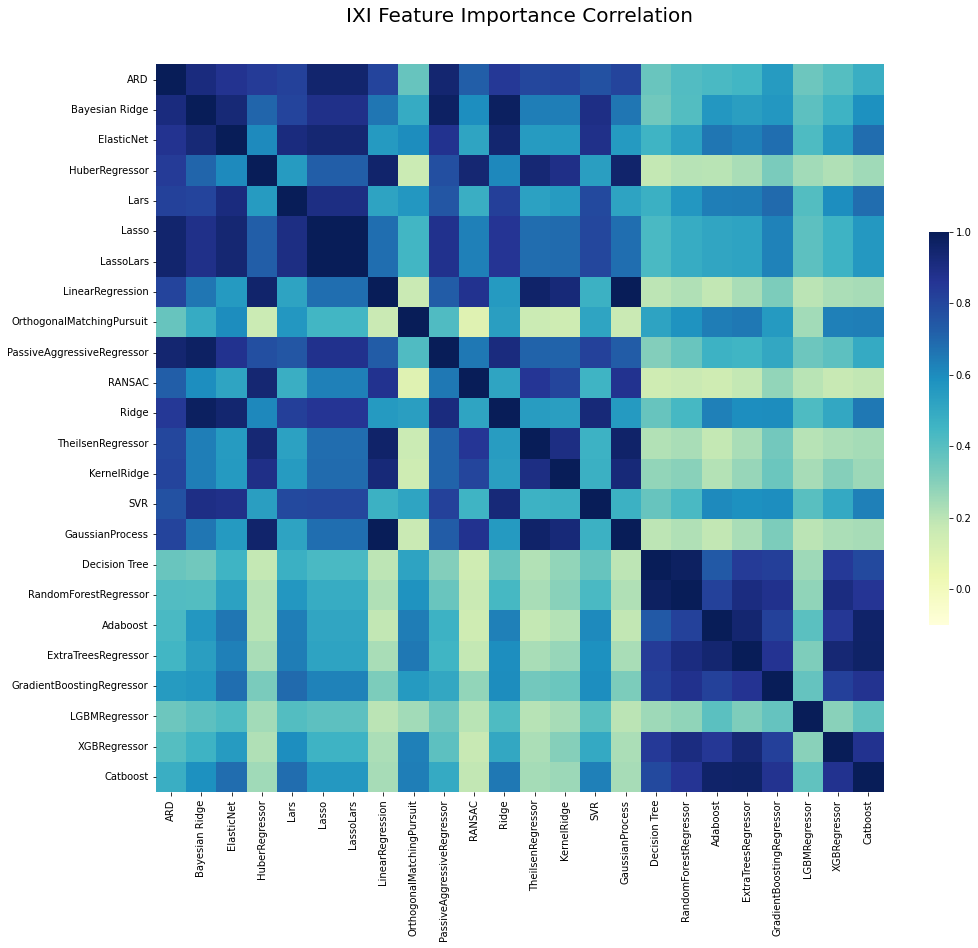

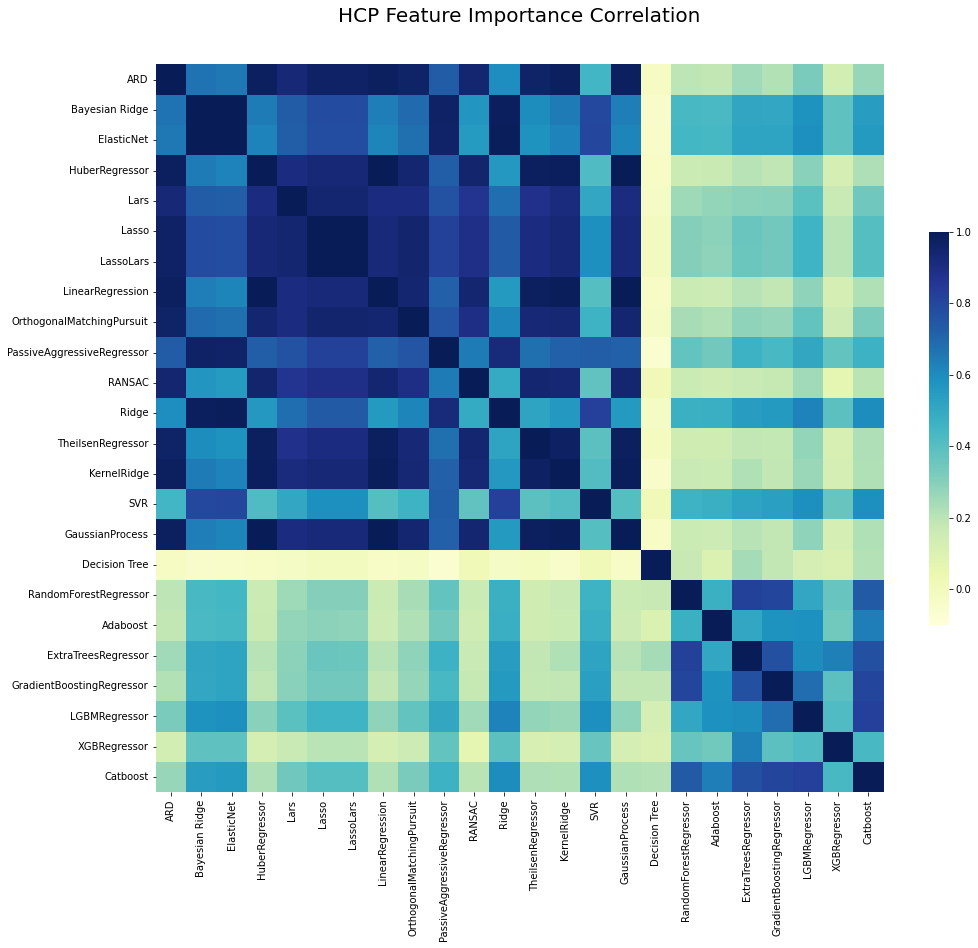

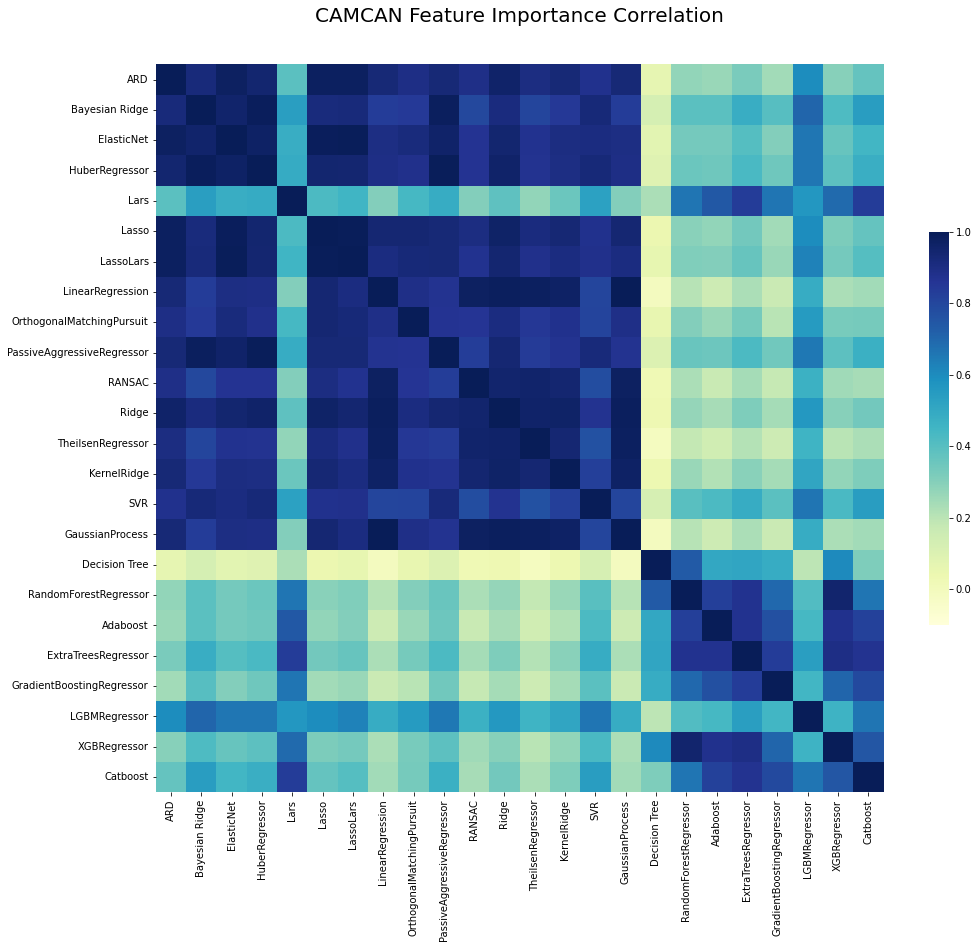

In [138]:
save_feat_heatmap(ixi_feat_imp_corr_sort, 'IXI', 'ixi_feat_imp_heatmap',vmin=1, vmax=0)
save_feat_heatmap(hcp_feat_imp_corr_sort, 'HCP', 'hcp_feat_imp_heatmap',vmin=1, vmax=0)
save_feat_heatmap(cc_feat_imp_corr_sort, 'CAMCAN', 'cc_feat_imp_heatmap',vmin=1, vmax=0)

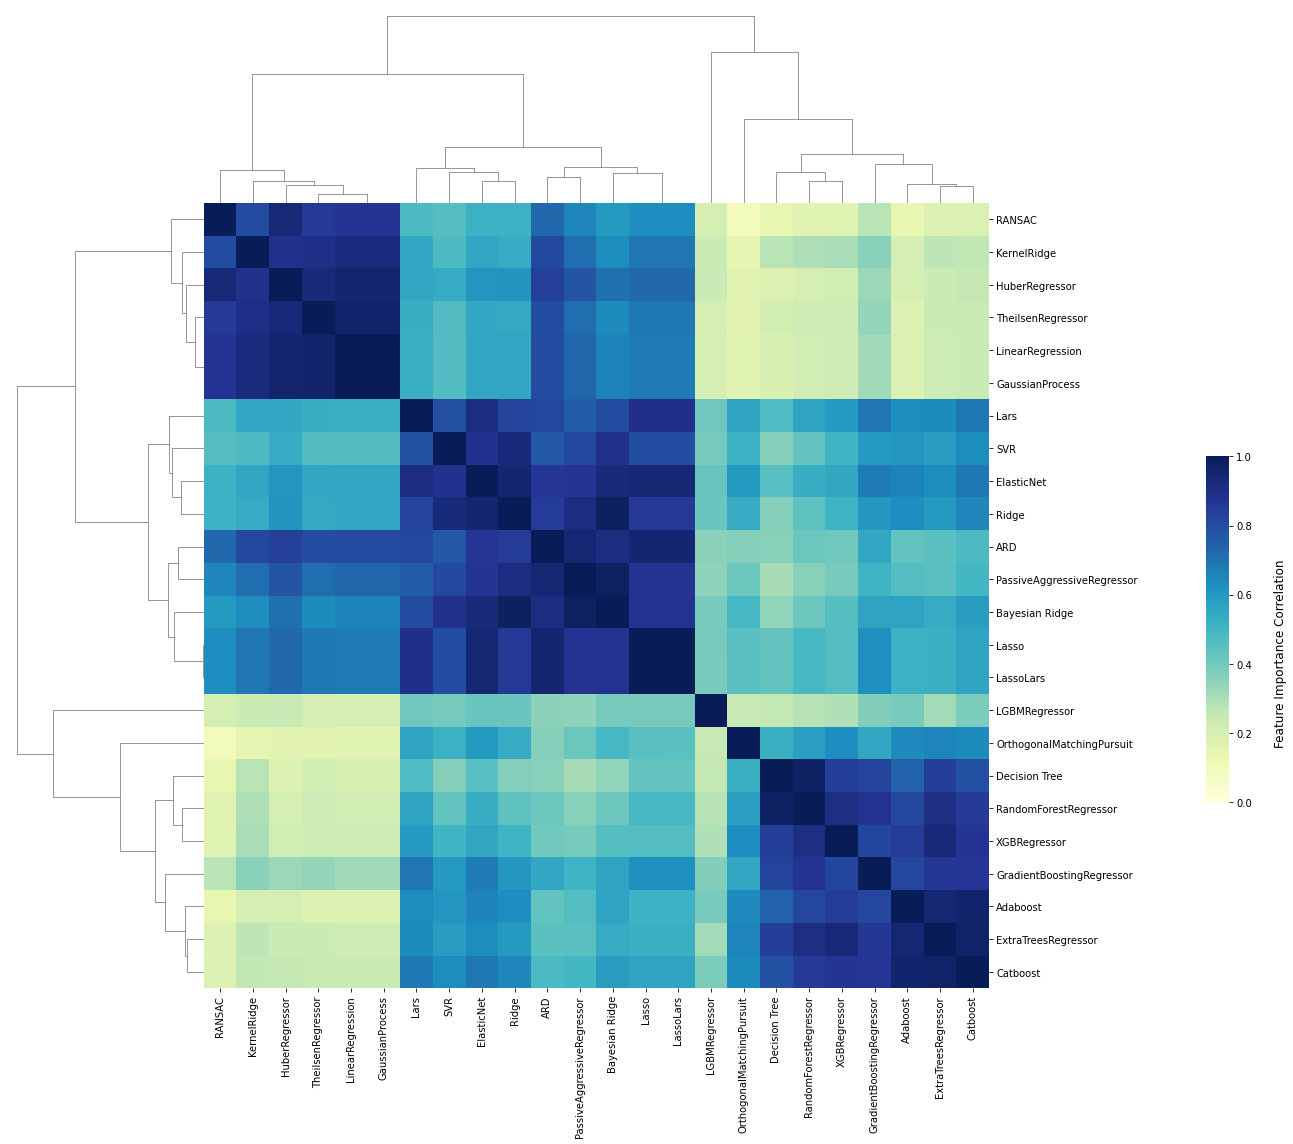

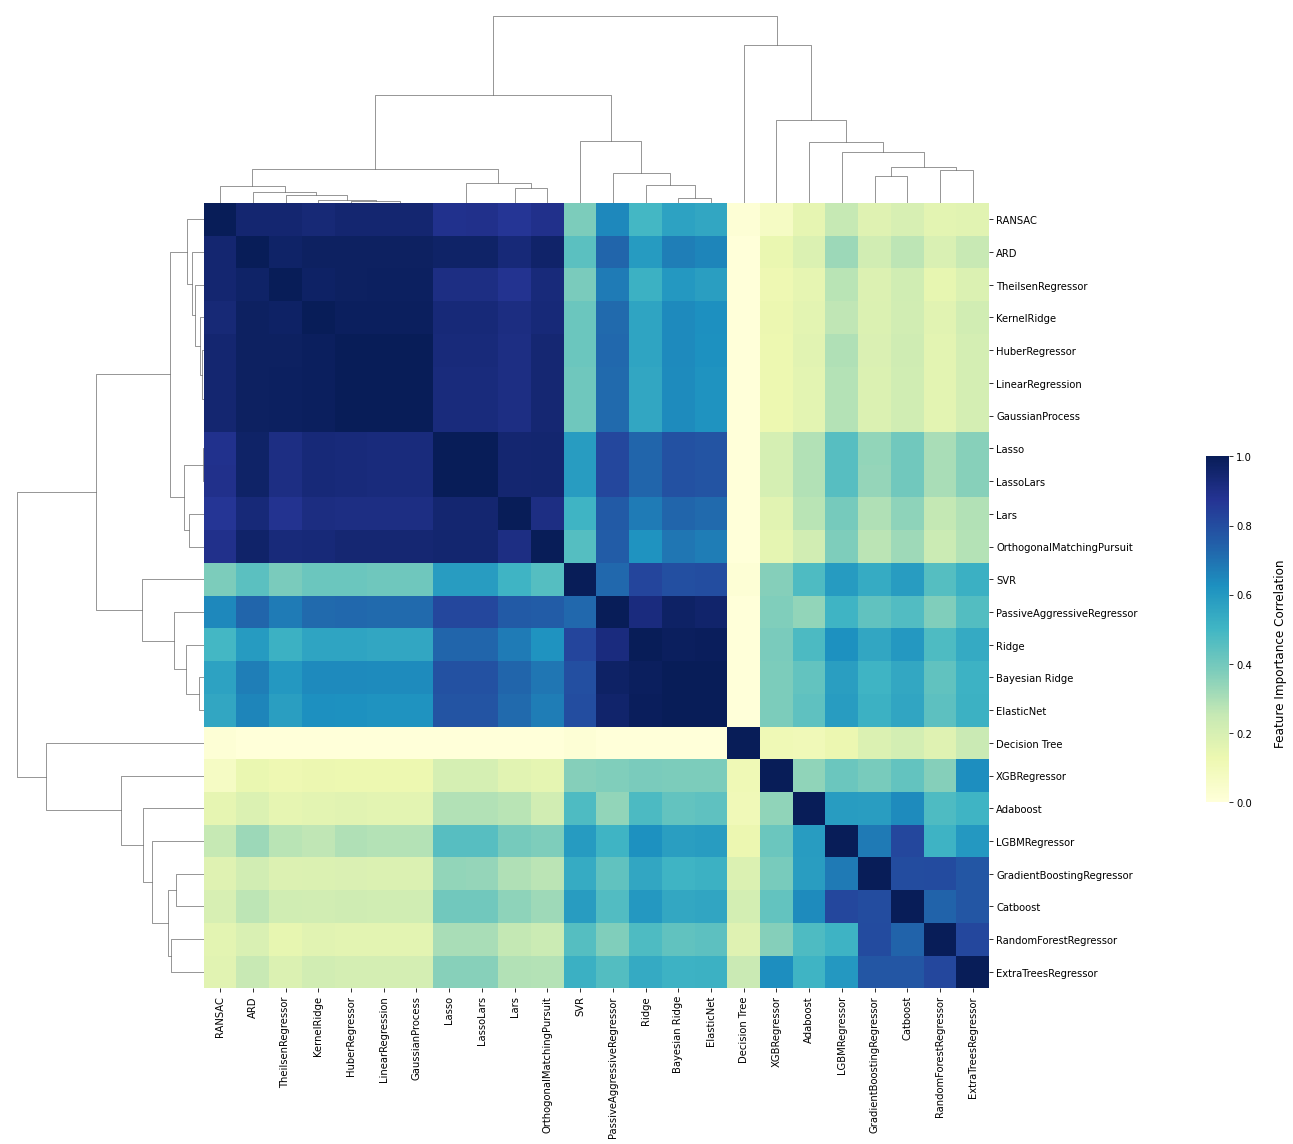

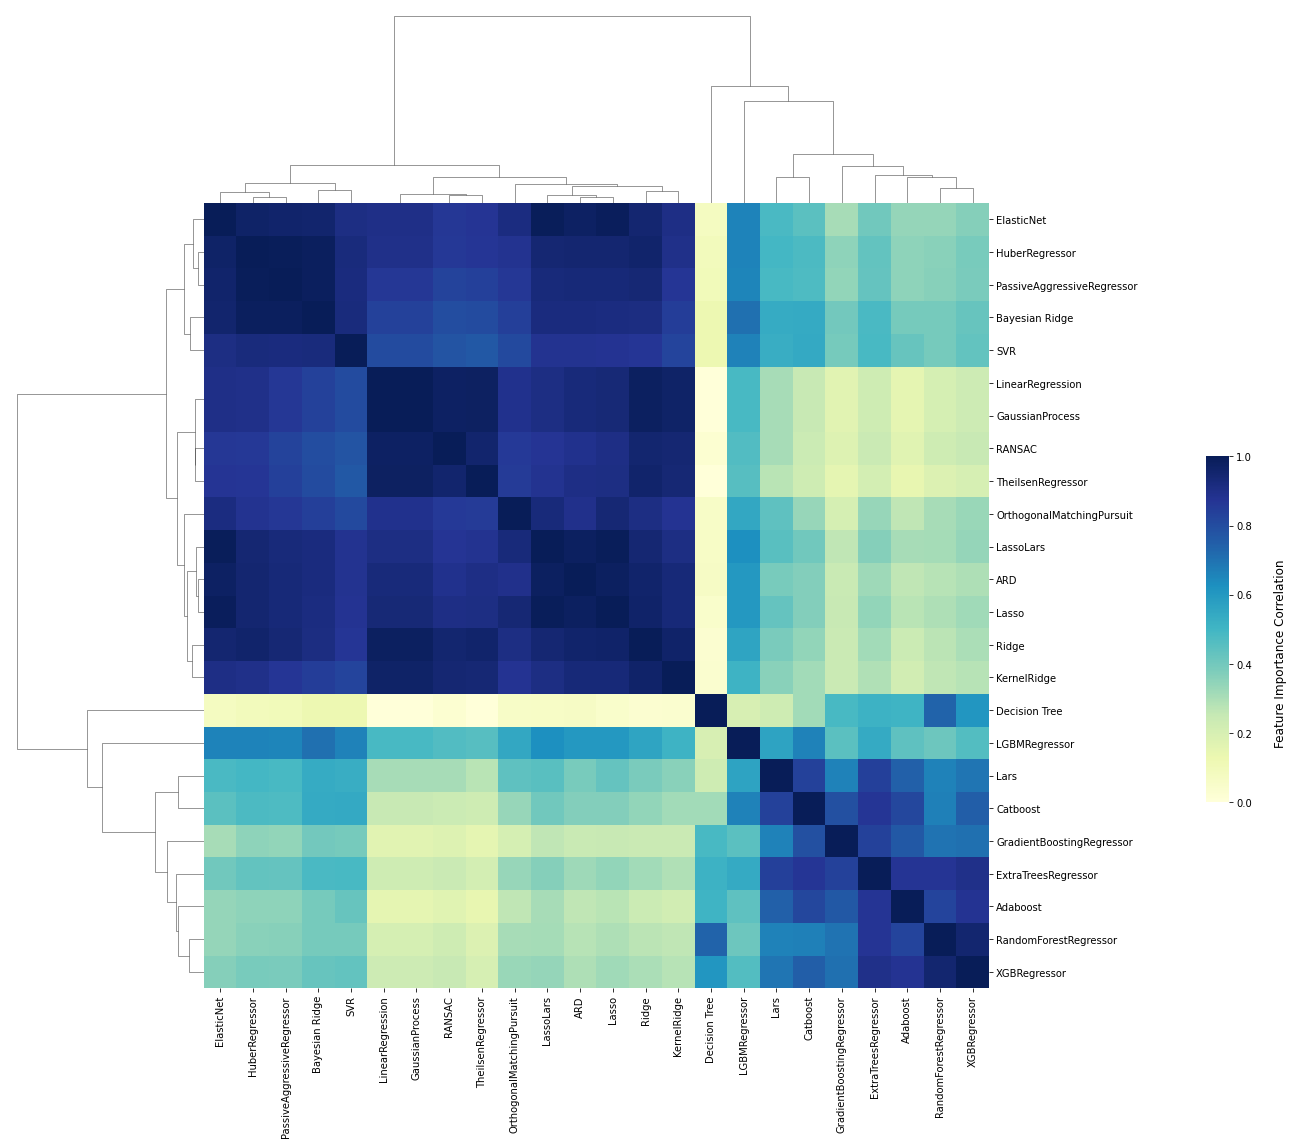

In [139]:
save_feat_clustermap(ixi_feat_imp_corr_sort, 'IXI', 'ixi_feat_imp_hierar_cluster')
save_feat_clustermap(hcp_feat_imp_corr_sort, 'HCP', 'hcp_feat_imp_hierar_cluster')
save_feat_clustermap(cc_feat_imp_corr_sort, 'CAMCAN', 'cc_feat_imp_hierar_cluster')

### Predicted Brain Age

In [140]:
def save_age_heatmap(age_corr_df, dataset, save_file_name, vmin=None, vmax=None):
    plt.figure(figsize=(15,15))

    dataplot = sns.heatmap(age_corr_df, vmin=vmin, vmax=vmax, cmap="YlGnBu", annot=False, square=True,cbar_kws={'shrink': 0.4})
    plt.title(f'{dataset} Brain Age Correlation', fontsize=20, y=1.05)
    plt.tight_layout()
    plt.savefig(f'./visualization/{save_file_name}.png', dpi=300)

In [141]:
def save_age_clustermap(age_corr_df, dataset, save_file_name):
    g = sns.clustermap(age_corr_df, cmap='YlGnBu', col_cluster=True, figsize=(16,16), square=True)
                    
    #g.fig.suptitle(f'{dataset} Brain Age Hierachical Clustering', y=0.92, fontsize=20)
    x0, _y0, _w, _h = g.cbar_pos
    g.ax_cbar.set_position([1.05, 0.3, 0.02, 0.3])
    g.ax_cbar.set_title('Brain Age Correlation', y=1.05)

    g.savefig(f'./visualization/{save_file_name}.png', bbox_inches='tight',pad_inches = 0, dpi=300)


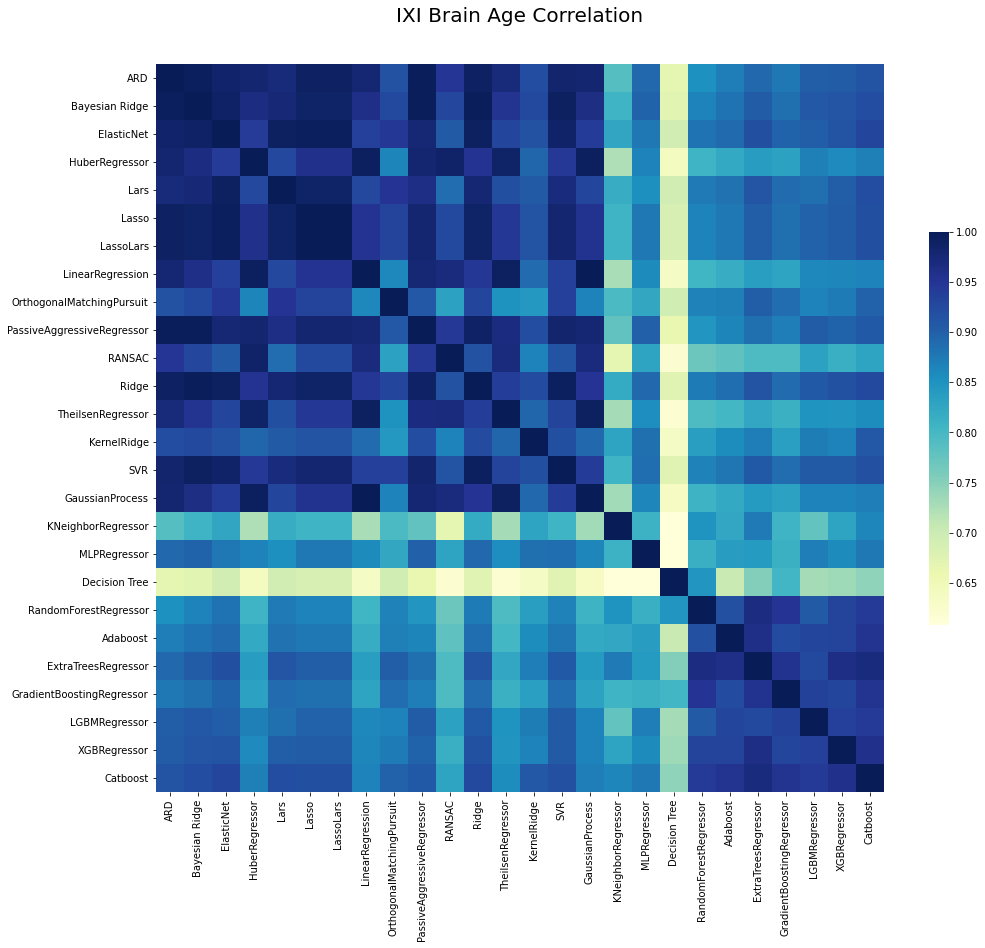

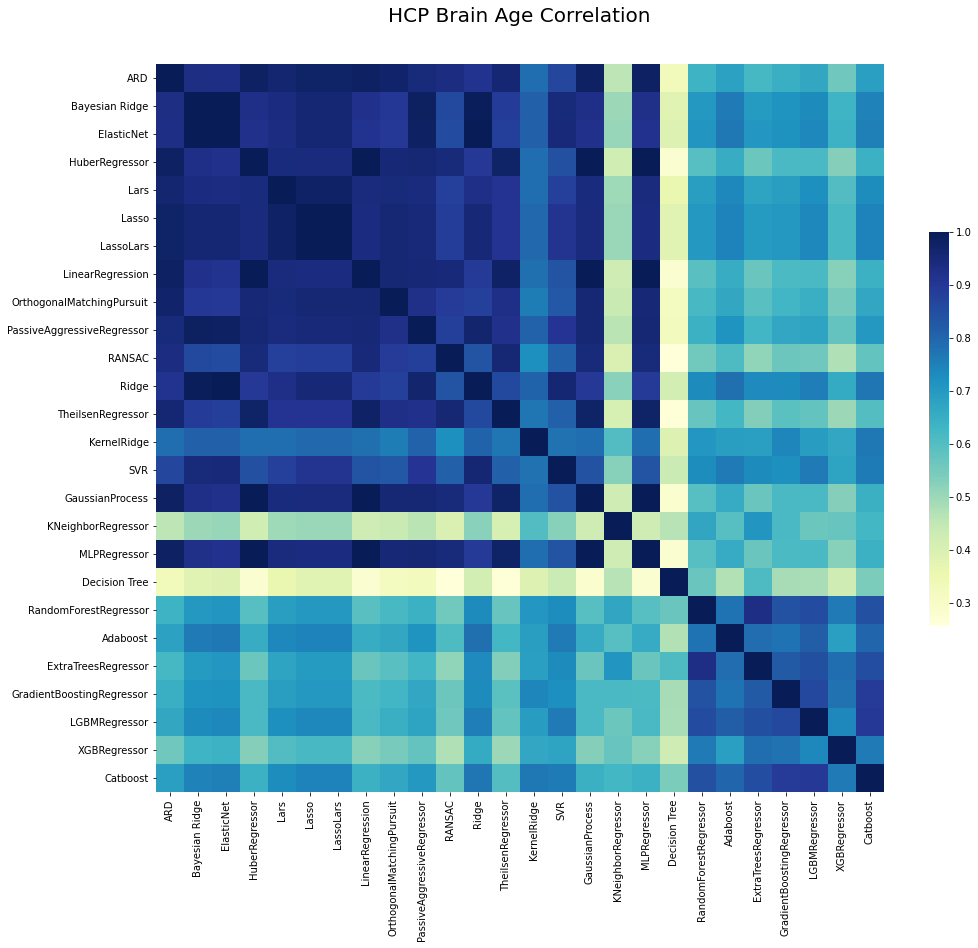

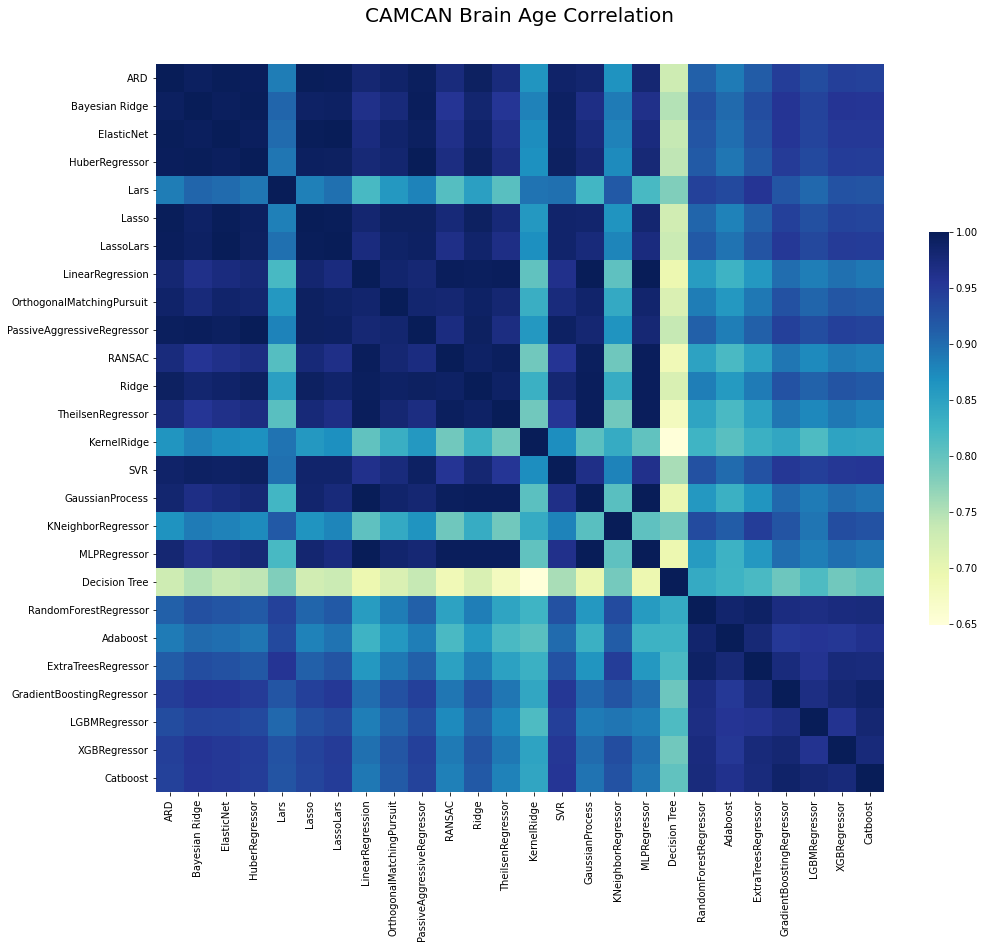

In [142]:
save_age_heatmap(ixi_predicted_age_corr_sort, 'IXI', 'ixi_pred_age_corr_heatmap_function')
save_age_heatmap(hcp_predicted_age_corr_sort, 'HCP', 'hcp_pred_age_corr_heatmap_function')
save_age_heatmap(cc_predicted_age_corr_sort, 'CAMCAN', 'cc_pred_age_corr_heatmap_function')

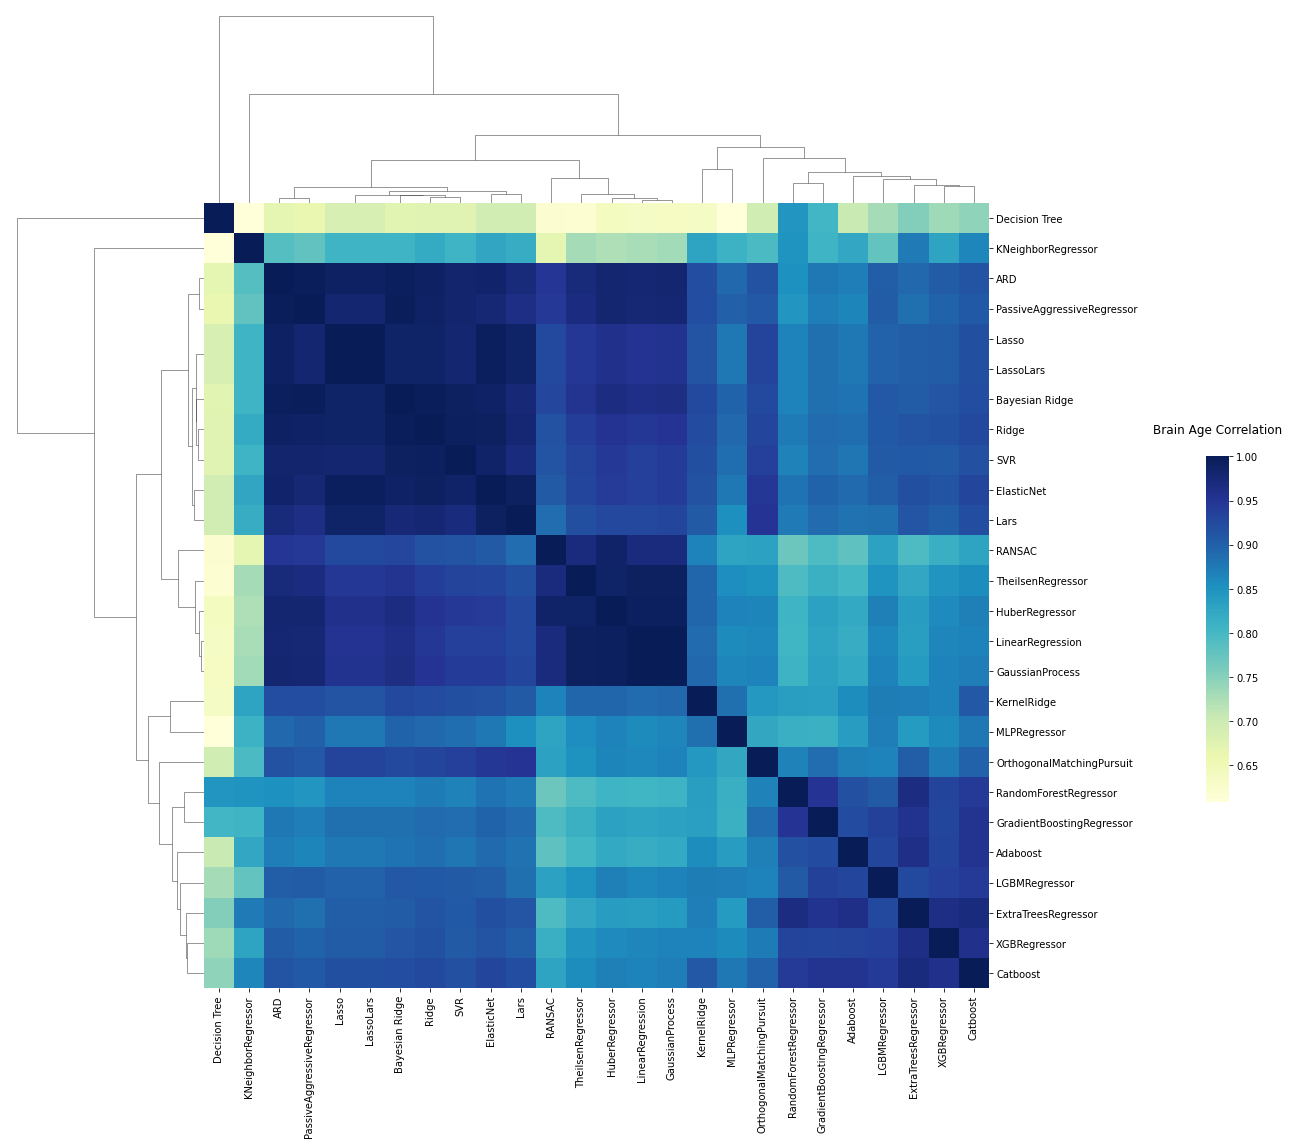

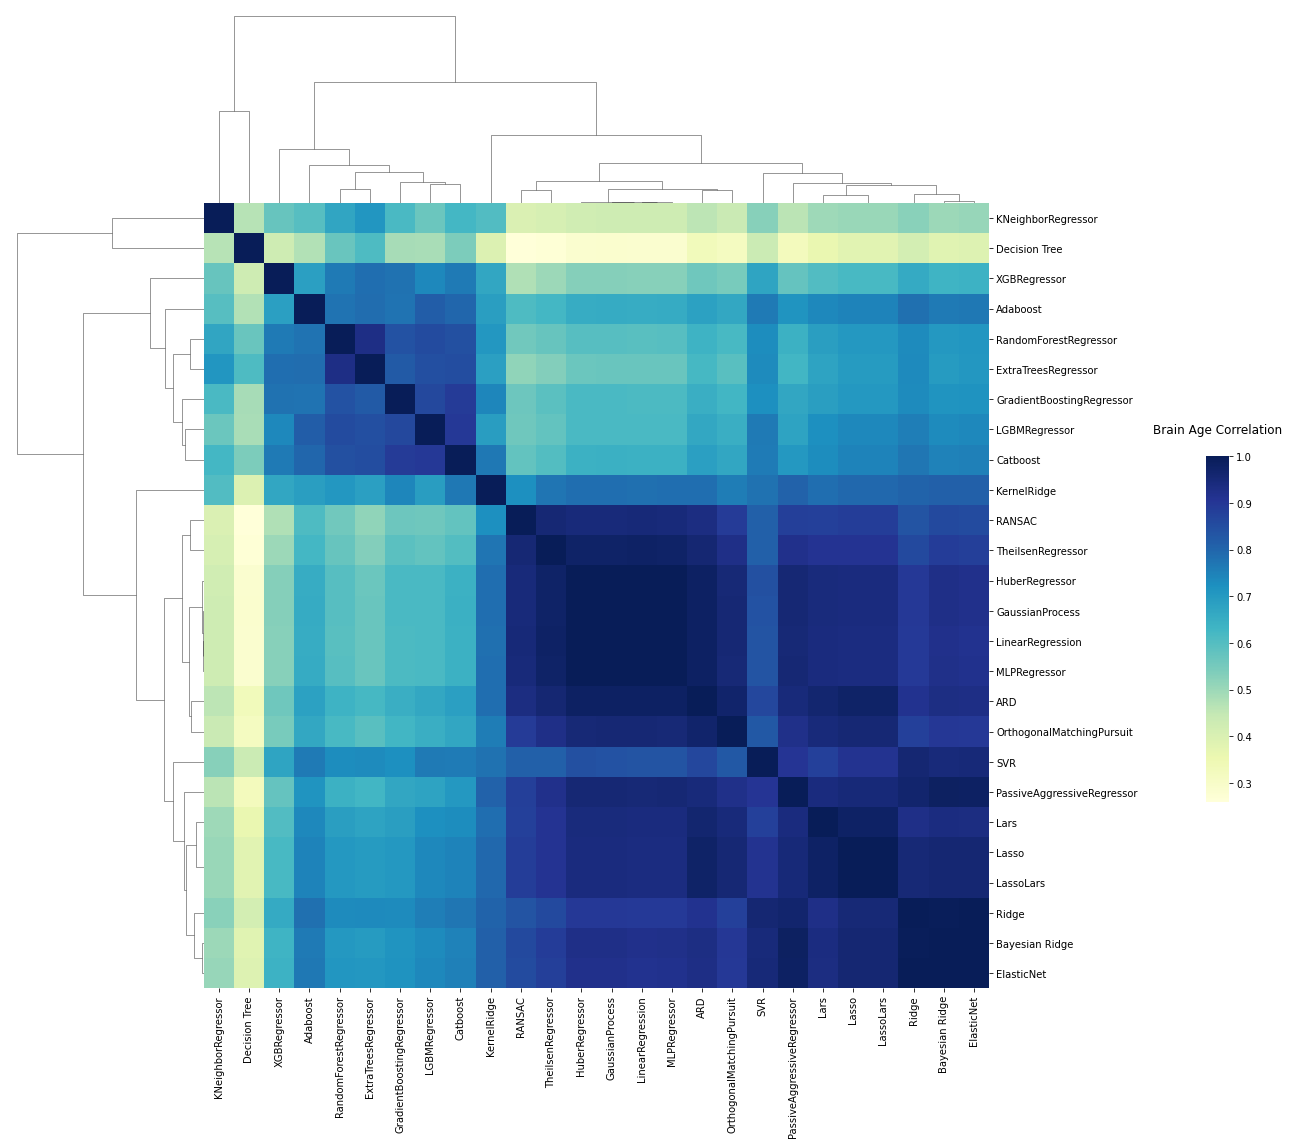

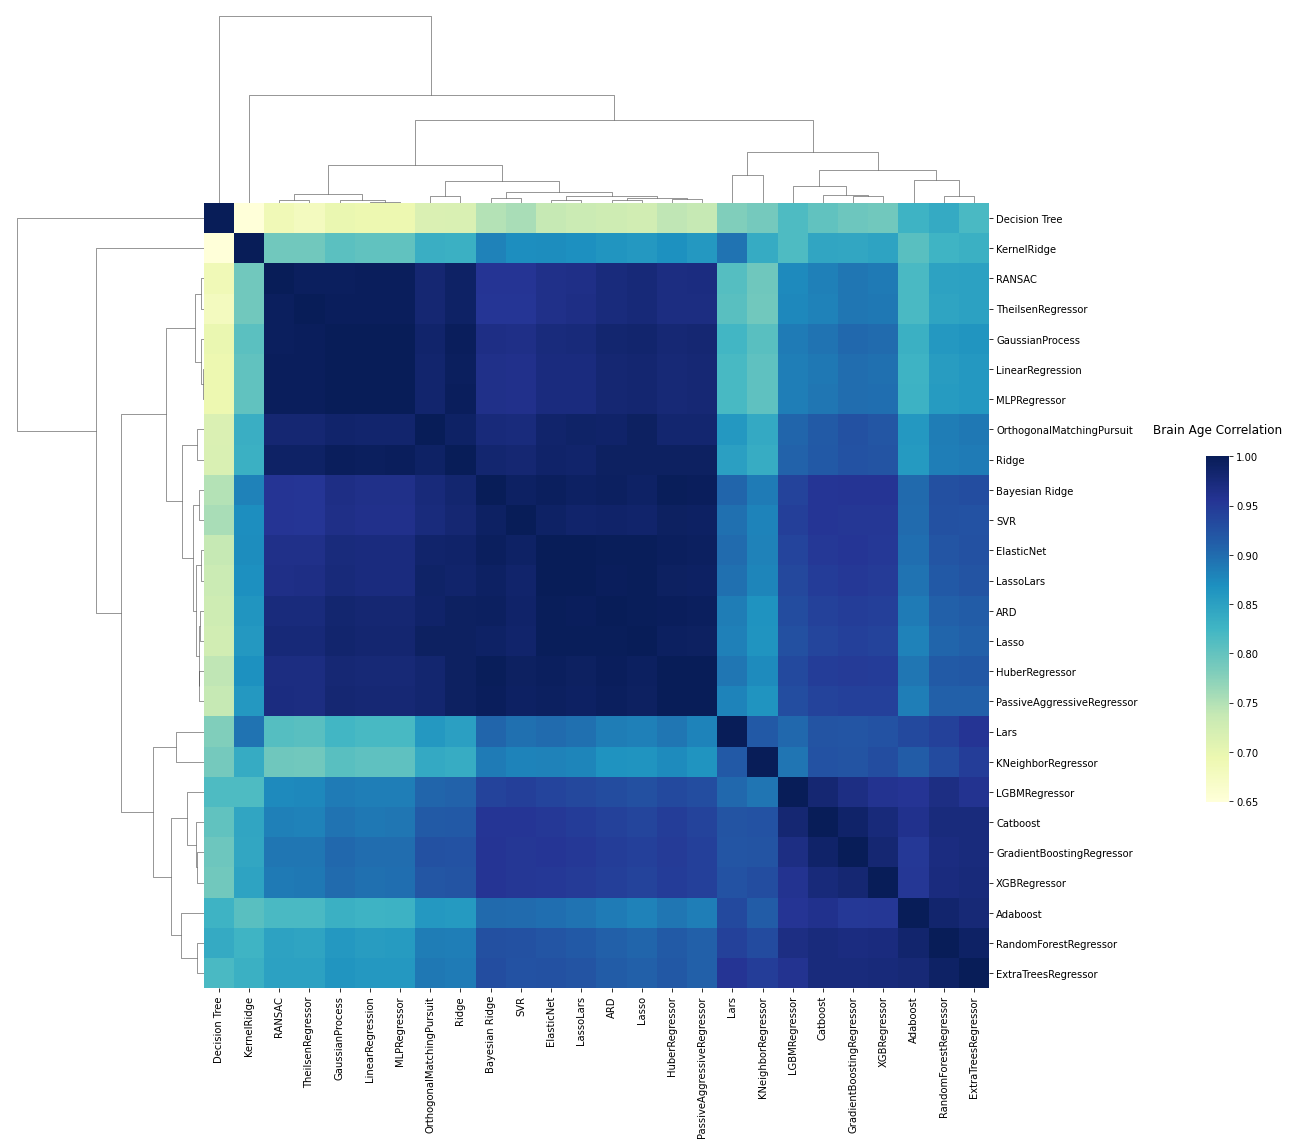

In [143]:
save_age_clustermap(ixi_predicted_age_corr_sort, 'IXI', 'ixi_pred_age_hierar_cluster')
save_age_clustermap(hcp_predicted_age_corr_sort, 'HCP', 'hcp_pred_age_hierar_cluster')
save_age_clustermap(cc_predicted_age_corr_sort, 'CAMCAN', 'cc_pred_age_hierar_cluster')

### Violin Plot

In [144]:
ixi_predicted_age = pd.read_csv('dataframe/ixi/ixi_predicted_age.csv', index_col=0)
hcp_predicted_age = pd.read_csv('dataframe/hcp/hcp_predicted_age.csv', index_col=0)
cc_predicted_age = pd.read_csv('dataframe/cc/cc_predicted_age.csv', index_col=0)

In [146]:
model_convert_name_dict = {}
long_model_name_list = ixi_predicted_age.columns.to_list()
short_model_name_list = ['lr','lasso','ridge','en','lar','llar','omp','br','ard','par','ransac','tr','huber','kr','svr','gp','dt','rf','et','ada','gbm','xgb','lgbm','catboost','knn','mlp']
for i in range(len(long_model_name_list)):
    model_convert_name_dict[long_model_name_list[i]] = short_model_name_list[i]

In [147]:
model_convert_name_dict = {}
long_model_name_list = ixi_predicted_age.columns.to_list()
short_model_name_list = ['lr','lasso','ridge','en','lar','llar','omp','br','ard','par','ransac','tr','huber','kr','svr','gp','dt','rf','et','ada','gbm','xgb','lgbm','catboost','knn','mlp']
for i in range(len(long_model_name_list)):
    model_convert_name_dict[long_model_name_list[i]] = short_model_name_list[i]

def violin_dataframe(predicted_age):
    model_list = predicted_age.columns
    violin_df = pd.DataFrame()
    
    for col in model_list:
        subset = predicted_age.loc[:, [col]]
        subset['Model'] = col 
        subset.columns = ['Predicted_age', 'Model']
        
        violin_df = pd.concat([violin_df, subset], axis=0)
    
    violin_df = violin_df.reset_index(drop=True)
    
    violin_df['Model'] = violin_df['Model'].apply(lambda x : model_convert_name_dict[x])
    
    return violin_df
    

In [148]:
ixi_violin_df = violin_dataframe(ixi_predicted_age)
hcp_violin_df = violin_dataframe(hcp_predicted_age)
cc_violin_df = violin_dataframe(cc_predicted_age)

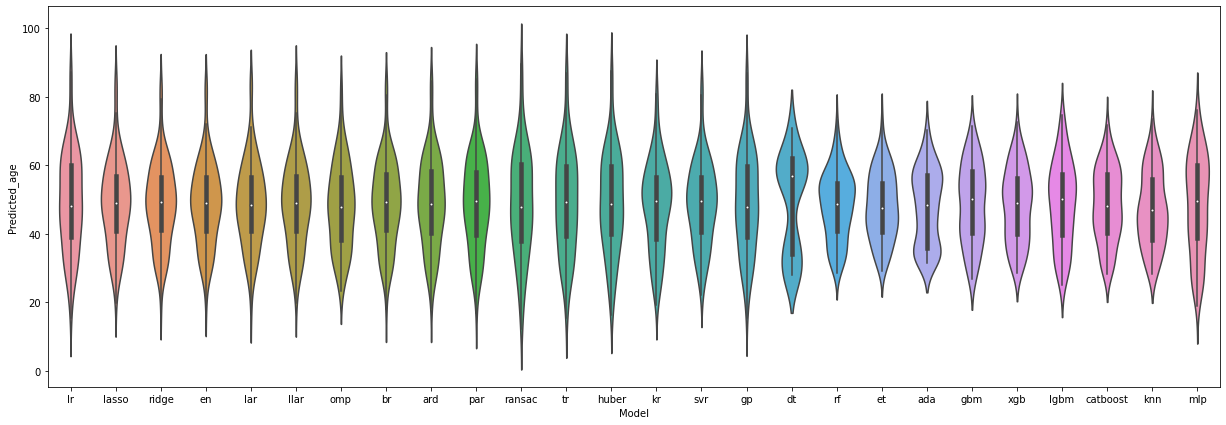

In [149]:
plt.figure(figsize=(21,7))
sns.violinplot(data=ixi_violin_df, x='Model', y='Predicted_age')
plt.savefig('./visualization/ixi_violinplot.png')
plt.show()

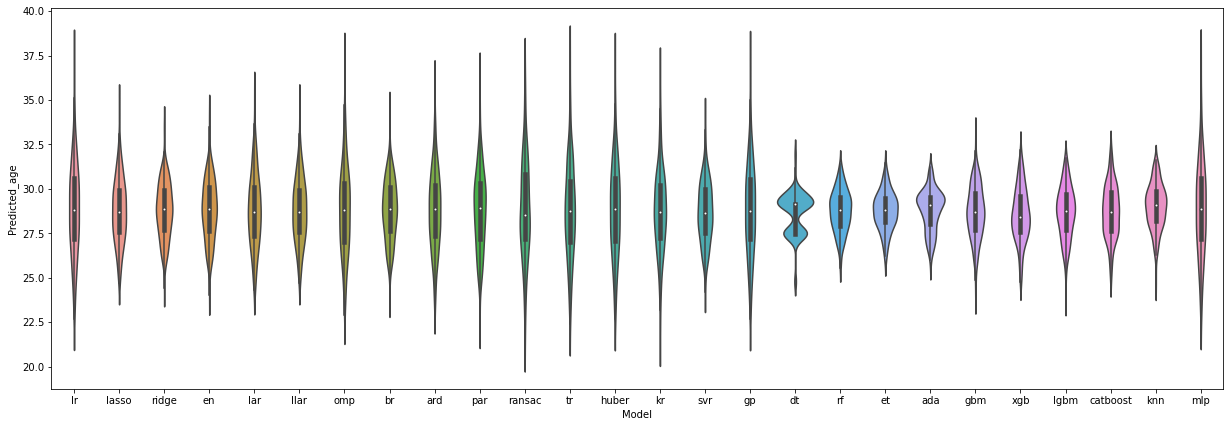

In [150]:
plt.figure(figsize=(21,7))
sns.violinplot(data=hcp_violin_df, x='Model', y='Predicted_age')
plt.savefig('./visualization/hcp_violinplot.png')
plt.show()

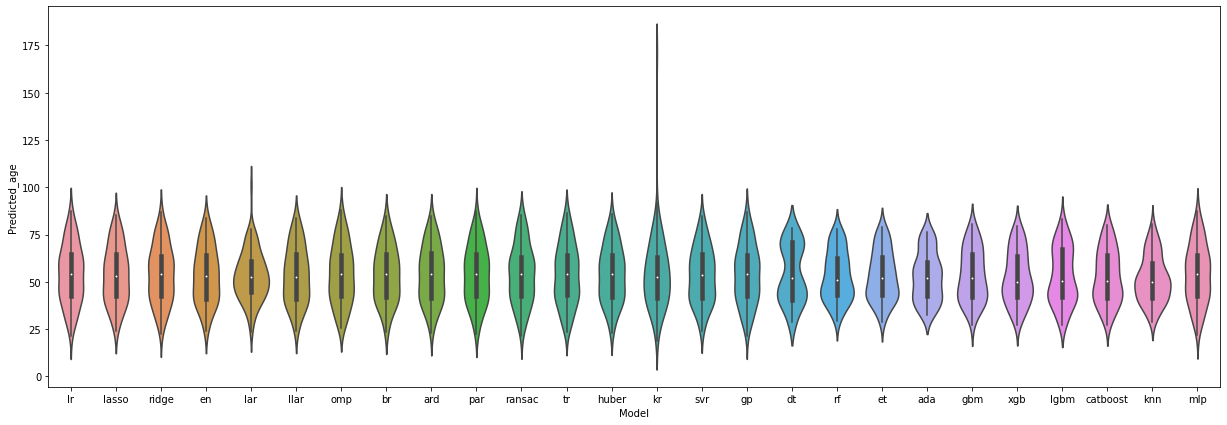

In [151]:
plt.figure(figsize=(21,7))
sns.violinplot(data=cc_violin_df, x='Model', y='Predicted_age')
plt.savefig('./visualization/cc_violinplot.png')
plt.show()

### Violin Plot with Gender

In [152]:
ixi_gender = pd.read_csv('./dataset_with_sex/ixi_test.csv', index_col=0)
hcp_gender = pd.read_csv('./dataset_with_sex/hcp_test.csv', index_col=0)
cc_gender = pd.read_csv('./dataset_with_sex/cc_test.csv', index_col=0)

In [153]:
ixi_gender = ixi_gender['SEX'].reset_index(drop=True)
hcp_gender = hcp_gender['Sex'].reset_index(drop=True)
cc_gender = cc_gender['sex'].reset_index(drop=True)

In [154]:
model_convert_name_dict = {}
long_model_name_list = ixi_predicted_age.columns.to_list()
short_model_name_list = ['lr','lasso','ridge','en','lar','llar','omp','br','ard','par','ransac','tr','huber','kr','svr','gp','dt','rf','et','ada','gbm','xgb','lgbm','catboost','knn','mlp']
for i in range(len(long_model_name_list)):
    model_convert_name_dict[long_model_name_list[i]] = short_model_name_list[i]

def violin_dataframe_with_gender(predicted_age, dataset):
    model_list = predicted_age.columns
    violin_df = pd.DataFrame()
    
    if dataset == 'ixi':
        gender_col = ixi_gender
    elif dataset == 'hcp':
        gender_col = hcp_gender
    elif dataset == 'cc':
        gender_col = cc_gender
        
    if dataset == 'ixi':
        gender_col = gender_col.apply(lambda x : 'male' if x < 0 else 'female' )
    else: 
        gender_col = gender_col.apply(lambda x : 'male' if x==1 else 'female')
    
    for col in model_list:
        subset = predicted_age.loc[:, [col]]
        subset['Model'] = col 
        subset['Gender'] = gender_col
        subset.columns = ['Predicted_age', 'Model', 'Gender']
        
        violin_df = pd.concat([violin_df, subset], axis=0)
    
    violin_df = violin_df.reset_index(drop=True)
    violin_df['Model'] = violin_df['Model'].apply(lambda x : model_convert_name_dict[x])
    
    return violin_df
    

In [155]:
ixi_violin_df_with_gender = violin_dataframe_with_gender(ixi_predicted_age, 'ixi')
hcp_violin_df_with_gender = violin_dataframe_with_gender(hcp_predicted_age, 'hcp')
cc_violin_df_with_gender = violin_dataframe_with_gender(cc_predicted_age, 'cc')

In [156]:
ixi_violin_df_with_gender

,Predicted_age,Model,Gender
0,47.539154,lr,male
1,33.091843,lr,male
2,57.961174,lr,male
3,38.447903,lr,female
4,32.979576,lr,female
...,...,...,...
2959,57.145097,mlp,female
2960,47.425782,mlp,male
2961,29.920670,mlp,female
2962,39.308361,mlp,female


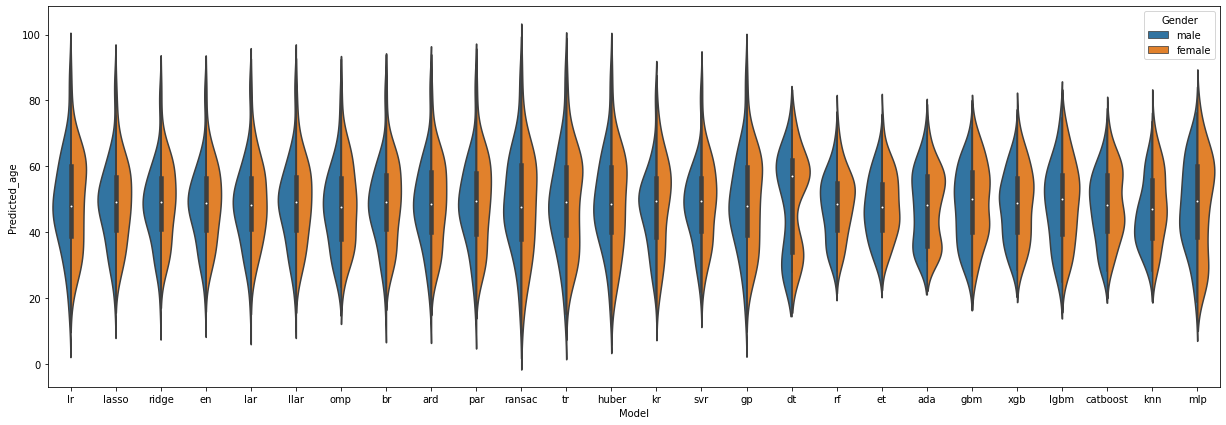

In [157]:
plt.figure(figsize=(21,7))
sns.violinplot( x='Model', y='Predicted_age', data=ixi_violin_df_with_gender, hue='Gender', split=True)
plt.savefig('./visualization/ixi_with_sex_violinplot.png')
plt.show()

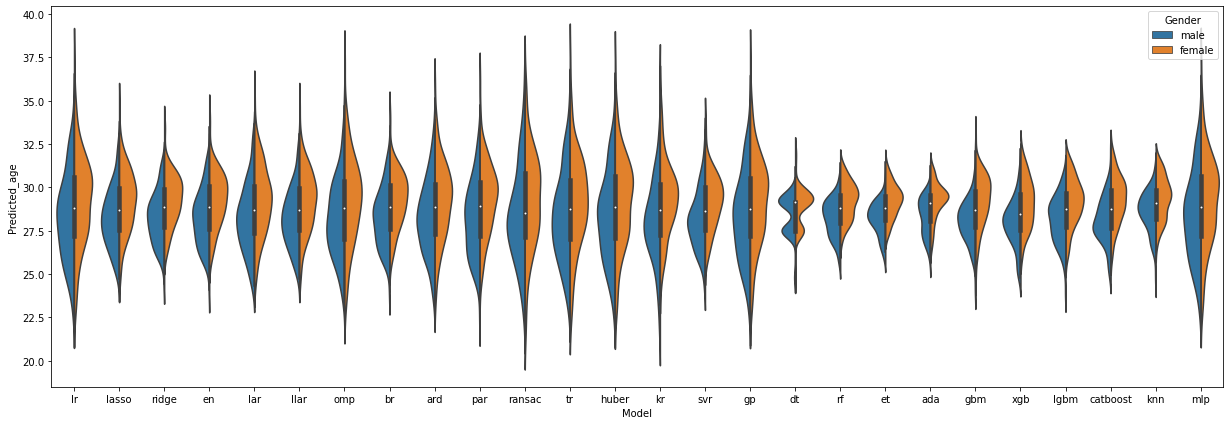

In [158]:
plt.figure(figsize=(21,7))
sns.violinplot( x='Model', y='Predicted_age', data=hcp_violin_df_with_gender, hue='Gender', split=True)
plt.savefig('./visualization/hcp_with_sex_violinplot.png')
plt.show()

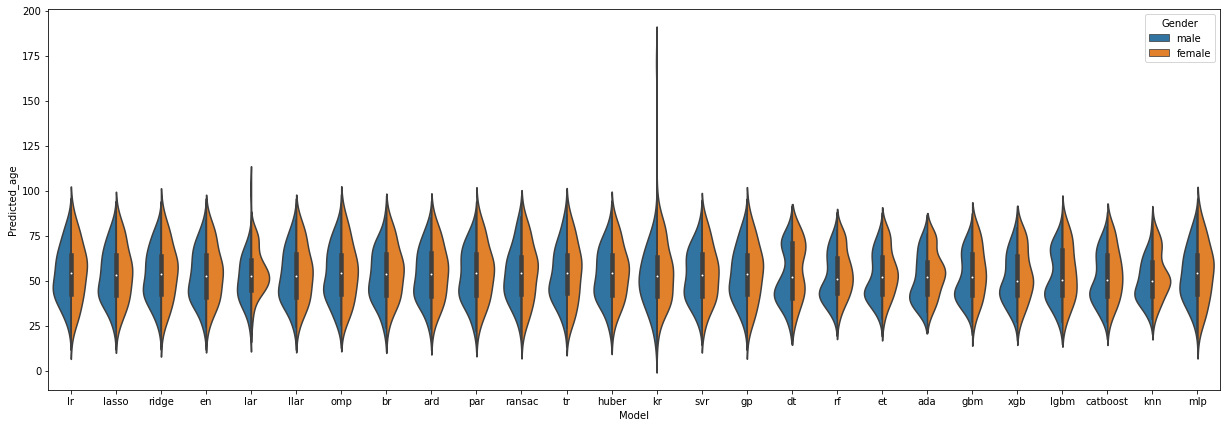

In [159]:
plt.figure(figsize=(21,7))
sns.violinplot( x='Model', y='Predicted_age', data=cc_violin_df_with_gender, hue='Gender', split=True)
plt.savefig('./visualization/cc_with_sex_violinplot.png')
plt.show()

# Relevance Vector Machine

In [160]:
from pycaret.regression import *
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import *
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import *
from xgboost.sklearn import XGBRegressor
from lightgbm.sklearn import LGBMRegressor
from catboost.core import CatBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, DotProduct
from sklearn_rvm.em_rvm import EMRVR

# MAE, MSE, RMSE
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

In [191]:
rvr = EMRVR(kernel='linear', max_iter=5000)


rvr.fit(ixi_train.drop('age', axis=1), ixi_train['age'])

In [192]:
ixi_rvr_pred = rvr.predict(ixi_test.drop('age', axis=1), return_std=False)

In [193]:
mean_absolute_error(ixi_rvr_pred, ixi_test['age'])

9.308249106712378

In [194]:
cc_gp = GaussianProcessRegressor(alpha=1.0, kernel=DotProduct(sigma_0=1))
cc_gp.fit(cc_train.drop('age', axis=1), cc_train['age'])
cc_gp_pred = cc_gp.predict(cc_test.drop('age', axis=1))

In [202]:
cc_gp.L_.shape

(500, 500)

In [203]:
cc_train.shape

(500, 154)

In [205]:
pd.DataFrame(cc_gp.L_)

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.388571e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.420974e+06,6854.932978,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1.310757e+06,6509.445445,9452.783274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1.528881e+06,5619.692819,-7296.365654,5696.003579,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,1.466164e+06,907.036139,-5396.554919,2857.634228,3493.238328,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1.598316e+06,26961.194039,-1252.708971,8000.943983,-3267.991987,-6715.645581,2016.039439,1107.881424,-941.388409,905.680401,...,-0.012883,0.005573,-0.007547,0.054175,0.017073,1.207663,0.000000,0.000000,0.000000,0.000000
496,1.392743e+06,28044.842826,11656.008179,-1272.944882,-4140.702278,-2887.691173,4789.524043,-969.815204,-1499.201719,962.332851,...,0.009843,0.007987,-0.001070,0.032543,0.027012,0.035445,1.199524,0.000000,0.000000,0.000000
497,1.420811e+06,37536.500189,12771.906371,-2959.835133,-5608.940665,-4550.223727,9520.627639,-3032.592359,-2066.065463,2650.509249,...,-0.012665,0.071885,0.005813,0.031570,0.037759,-0.039416,0.006148,1.311610,0.000000,0.000000
498,1.448145e+06,36453.225468,10011.505461,-4419.250196,-7434.046378,-5826.483934,8808.563185,-3178.994179,-2082.206073,1407.225473,...,0.000582,-0.022192,0.011073,0.009280,-0.034443,0.006834,-0.019934,0.035213,1.166253,0.000000


In [206]:
cc_gp.alpha_

array([  1.83093276, -11.29939274,  -3.40853157, -13.8921736 ,
        -5.21195904,  -1.4841826 ,  -7.83114882,  -5.64726082,
         0.31882489,  -5.58892744,  -2.89978445,  -7.18382415,
         2.48654677,   0.03345097,  -2.07627731,  -2.6144072 ,
        -4.22780491,  -4.32493518, -13.49969431,  -1.05144252,
         0.43258985,  -2.94119426, -12.83703279,  -5.61035649,
        -7.28905397,   0.31381949,  -1.63904922,  -3.70180943,
        -2.00440089,  -3.84957935,  -5.51128606, -11.82587257,
        -4.94799075,  -0.88179098, -18.86437416,  -5.91998787,
        -1.93434445,  -3.18776721,  -0.33485329,  -7.6369261 ,
       -13.97014545,   0.65385956,  -6.06880379,  -1.95799382,
         1.27679226,  -4.58110777,  -4.50373999,  -5.7801557 ,
        -6.50924374,  -2.22091516,  -1.3970245 ,  -7.84739745,
         6.93758105,   2.42632077,   0.36786692,   0.95781305,
        -5.12424891,   1.8080905 ,  -6.27012214,   4.87923203,
        -7.00769975,   7.51421314,  -4.59185369,   5.05

# Model Parameters

In [211]:
ixi_trained_model, ixi_trained_model_name = load_pipelines('ixi')
hcp_trained_model, hcp_trained_model_name = load_pipelines('hcp')
cc_trained_model, cc_trained_model_name = load_pipelines('cc')

Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and 

In [216]:
ixi_model_param_dict = {}
for i in range(len(ixi_trained_model)):
    ixi_model_param_dict[ixi_trained_model_name[i]] = ixi_trained_model[i]['trained_model']

ixi_model_param_dict

{'Adaboost': AdaBoostRegressor(base_estimator=None, learning_rate=0.5, loss='square',
                   n_estimators=230, random_state=1),
 'ARD': ARDRegression(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
               fit_intercept=True, lambda_1=1.7, lambda_2=1.7, n_iter=300,
               normalize=False, threshold_lambda=10000.0, tol=0.001,
               verbose=False),
 'Bayesian Ridge': BayesianRidge(alpha_1=0.0001, alpha_2=0.001, alpha_init=None,
               compute_score=False, copy_X=True, fit_intercept=True,
               lambda_1=0.3, lambda_2=0.05, lambda_init=None, n_iter=300,
               normalize=False, tol=0.001, verbose=False),
 'Decision Tree': DecisionTreeRegressor(ccp_alpha=0.2, criterion='mae', max_depth=6,
                       max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.05, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_w

In [217]:
hcp_model_param_dict = {}
for i in range(len(hcp_trained_model)):
    hcp_model_param_dict[hcp_trained_model_name[i]] = hcp_trained_model[i]['trained_model']

hcp_model_param_dict

{'Adaboost': AdaBoostRegressor(base_estimator=None, learning_rate=0.4, loss='exponential',
                   n_estimators=250, random_state=1),
 'ARD': ARDRegression(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
               fit_intercept=True, lambda_1=0.005, lambda_2=0.005, n_iter=300,
               normalize=False, threshold_lambda=10000.0, tol=0.001,
               verbose=False),
 'Bayesian Ridge': BayesianRidge(alpha_1=0.2, alpha_2=0.2, alpha_init=None, compute_score=False,
               copy_X=True, fit_intercept=True, lambda_1=0.005, lambda_2=0.3,
               lambda_init=None, n_iter=300, normalize=False, tol=0.001,
               verbose=False),
 'Decision Tree': DecisionTreeRegressor(ccp_alpha=0.1, criterion='mse', max_depth=None,
                       max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0001, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                